In [22]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F  # Make sure to import this at the top of your file
from dgl.data import DGLDataset 
import os
import sys
import base64
import piexif
from PIL import Image
import requests
import json
import dgl
import copy 
from dgllife.data import ESOL
from dgllife.utils import SMILESToBigraph, CanonicalAtomFeaturizer, atom_mass, BaseAtomFeaturizer
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

from io import BytesIO



In [23]:
import urllib.request


urllib.request.urlretrieve(
    "https://data.dgl.ai/tutorial/dataset/members.csv", "./members.csv"
)
urllib.request.urlretrieve(
    "https://data.dgl.ai/tutorial/dataset/interactions.csv",
    "./interactions.csv",
)

urllib.request.urlretrieve(
    "https://data.dgl.ai/tutorial/dataset/graph_edges.csv", "./graph_edges.csv"
)
urllib.request.urlretrieve(
    "https://data.dgl.ai/tutorial/dataset/graph_properties.csv",
    "./graph_properties.csv",
)
edges = pd.read_csv("./graph_edges.csv")
properties = pd.read_csv("./graph_properties.csv")

edges.head()

properties.head()

,graph_id,label,num_nodes
0,0,0,15
1,1,0,10
2,2,0,13
3,3,0,13
4,4,0,17


In [24]:
from rdkit import Chem

from nfp.preprocessing import MolAPreprocessor, GraphSequence

import keras
import keras.backend as K

from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler

from keras.layers import (Input, Embedding, Dense, BatchNormalization,
                                 Concatenate, Multiply, Add)

from keras.models import Model, load_model

from nfp.layers import (MessageLayer, GRUStep, Squeeze, EdgeNetwork,
                               ReduceBondToPro, ReduceBondToAtom, GatherAtomToBond, ReduceAtomToPro)
from nfp.models import GraphModel
from apply import predict_NMR_C,predict_NMR_H

ModuleNotFoundError: No module named 'nfp'

In [3]:
#open the csv file
import pandas as pd
df = pd.read_csv('Cloud_SQL_Export_2024-03-28 (15_32_23).csv',header=None)
sdbs_ids  = df[1].to_list()

In [6]:
print(len(set(sdbs_ids)))

16553


In [70]:
image_bytes = bytes.fromhex(df[df[3]!='\\x00'][df[1]==4945][3].values[0].replace('\\x','')
)
if image_bytes != bytes('None', 'utf-8') and image_bytes != b'\x00':
    with open(f'4945_2.png', 'wb') as f:
        f.write(image_bytes)

    img = Image.open(f'4945.png')
    try:
        exif_dict = piexif.load(img.info['exif'])
        #print(exif_dict['Exif'][37510])
        #if "Freq" in exif_dict['Exif'][37510].decode():
            #strings.append((row[1],exif_dict['Exif'][37510].decode()))
            #carbs += 1
            #carbon = True
            #if carbs == 10:
            #    find_carbon = True
        #else:
            #remove the images
            #os.remove(f'images/{row[1]}_{i}_{j}.png')
    except Exception as e:
        pass
        #if 'exif' in str(e):
        #    with open(f'img_except/{row[1]}_{i}_{j}.png', 'rb') as f:
        #        f.write(image_bytes)
                    

/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/591461737.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  image_bytes = bytes.fromhex(df[df[3]!='\\x00'][df[1]==4945][3].values[0].replace('\\x','')


In [71]:
len(set(sdbs_ids))

16553

In [7]:
df2 = pd.read_csv('scrape_data_CNMR.csv')
print(len(df2))

14194


In [8]:
import pubchempy as pcp

def get_smiles_from_name(molecular_name):
    try:
        compound = pcp.get_compounds(molecular_name, 'name')[0]  # Fetch the first matching compound
        return compound.isomeric_smiles  # Return the isomeric SMILES notation
    except IndexError:
        return "No compound found with that name."
    except Exception as e:
        return str(e)

# Example usage
molecular_name = "Caffeine"
smiles = get_smiles_from_name(molecular_name)
print(smiles)

CN1C=NC2=C1C(=O)N(C(=O)N2C)C


In [15]:
import piexif
import base64
import os
from PIL import Image
from tqdm import tqdm
#img = Image.open('spectras/7408/CNMR_7408_CDS01823_w_meta.png')
#exif_dict = piexif.load(img.info['exif'])
#print(exif_dict['Exif'][37510])
while True:
    try:
        strings = []
        find_carbon = False
        carbs = 0
        for i, row in tqdm(enumerate(df.values)):
            carbon = False
            for j in range(2, len(row)-1):
                image_bytes = bytes.fromhex(row[j][2:])
                if image_bytes != bytes('None', 'utf-8') and image_bytes != b'\x00':
                    with open(f'images/{row[1]}_{i}_{j}.png', 'wb') as f:
                        f.write(image_bytes)
        
                    img = Image.open(f'images/{row[1]}_{i}_{j}.png')
                    try:
                        exif_dict = piexif.load(img.info['exif'])
                        #print(exif_dict['Exif'][37510])
                        if "Freq" in exif_dict['Exif'][37510].decode():
                            strings.append((row[1],exif_dict['Exif'][37510].decode()))
                            carbs += 1
                            carbon = True
                            if carbs == 10:
                                find_carbon = True
                        else:
                            #remove the images
                            os.remove(f'images/{row[1]}_{i}_{j}.png')
                    except Exception as e:
                        if 'exif' in str(e):
                            with open(f'img_except/{row[1]}_{i}_{j}.png', 'rb') as f:
                                f.write(image_bytes)
        break
    
    except Exception as e:
        print(e)
        continue    
                    
                



4306it [06:36, 10.85it/s]


[Errno 60] Operation timed out: 'images/4100_4306_2.png'


6618it [05:16, 20.91it/s]  


[Errno 60] Operation timed out: 'images/53308_6618_2.png'


26839it [47:49,  9.35it/s] 


[Errno 60] Operation timed out: 'images/12872_26839_2.png'


26844it [01:34, 282.63it/s] 


[Errno 60] Operation timed out: 'images/12940_26844_2.png'


26862it [01:14, 358.41it/s] 


[Errno 60] Operation timed out: 'images/152_26862_2.png'


27031it [05:35, 80.56it/s]  


[Errno 60] Operation timed out


27031it [00:35, 762.35it/s] 


[Errno 60] Operation timed out


27031it [00:57, 470.84it/s] 


[Errno 60] Operation timed out


27043it [02:13, 202.04it/s] 


[Errno 60] Operation timed out: 'images/178_27043_2.png'


29487it [23:24, 21.00it/s]  


[Errno 60] Operation timed out: 'images/5031_29487_2.png'


29487it [01:32, 318.24it/s] 


[Errno 60] Operation timed out: 'images/5031_29487_2.png'


29504it [02:31, 194.58it/s] 


[Errno 60] Operation timed out: 'images/5295_29504_2.png'


29540it [04:43, 104.21it/s] 


[Errno 60] Operation timed out: 'images/5621_29540_2.png'


30618it [17:49, 28.63it/s]  


In [16]:
# #save strings as a pickle file
# ###DO NOT USE RUN THIS CELL MORE IF YOU ALREADY HAVE THE PICKLE FILE, it will overwrite it
# import pickle
# with open('carbon_freq.pickle', 'wb') as f:
#     pickle.dump(strings, f)

In [17]:
#open the pickle file
import pickle
with open('carbon_freq.pickle', 'rb') as f:
    strings2 = pickle.load(f)
print(len(strings2))

15020


In [18]:
import re
import numpy as np
import pandas as pd
shifts = '       ppm   Int.  Assign.\
    \n      185.82    70  F   1\
    \n      184.18   194  F   1\
    \n      182.55   205  F   1\
    \n      180.92    69  F   1\
    \n      134.62    80  F   2\
    \n      121.69   246  F   2\
    \n      108.74   252  F   2\
    \n       95.79    81  F   2\
    \n       27.07  1000      3\n  '
def parse_shifts(data_str, weighted=False):
    # Split the string into lines
    lines = data_str.strip().split('\n')
    
    # Skip the header line
    data_lines = lines[1:]
    
    # Prepare lists to store data
    shifts = []
    intensities = []
    ids = []
    
    # Process each line to extract data
    data_line_re = re.compile(r'^\s*(\d+\.\d+)\s+(\d+)\s+(\d+)') #This looks for a float, then a space, then an int, then a space, then another int (e.g. 123.45 678 9)
    #also look for float space, int space, Letter space, int
    data_line_re = re.compile(r'^\s*(\d+\.\d+)\s+(\d+)\s+(\d+)')

    for line in data_lines:
        match = data_line_re.match(line)
        if match:
            ppm = float(match.group(1))  # Shift value
            intensity = int(match.group(2))  # Intensity
            carbon_id = int(match.group(3))  # Carbon ID
            
            shifts.append(ppm)
            intensities.append(intensity)
            ids.append(carbon_id)
        else:
            print(f"Skipped line: {line}")  # Optionally print skipped lines for debugging
    
    # Create a DataFrame
    df = pd.DataFrame({
        'id': ids,
        'ppm': shifts,
        'intensity': intensities
    })
    
    # Compute the average shift for each carbon id
    if weighted:
        # Computing weighted average
        def weighted_avg(group):
            return np.average(group['ppm'], weights=group['intensity'])
        result_df = df.groupby('id').apply(weighted_avg).reset_index()
        result_df.columns = ['Carbon ID', 'Weighted Average Shift']
    else:
        # Computing simple average
        result_df = df.groupby('id')['ppm'].mean().reset_index()
        result_df.columns = ['Carbon ID', 'Average Shift']
    
    return result_df

#print(parse_shifts(shifts))
#print(parse_shifts(shifts, weighted=True))
parse_shifts('       ppm   Int.  Assign.\n       145.90   349     1        \n       126.63   929     2        \n       123.88   911     3        \n       122.70   839     4        \n        31.78   855     5        \n        31.59  1000     6        \n        29.94   983     7        \n        28.81   905     8        \n        22.59   949     9        \n        14.07   929    10        \n\n     Assigned with HMQC and HMBC. \n  ')

Skipped line: 
Skipped line:      Assigned with HMQC and HMBC.


,Carbon ID,Average Shift
0,1,145.90
1,2,126.63
2,3,123.88
3,4,122.70
4,5,31.78
5,6,31.59
6,7,29.94
7,8,28.81
8,9,22.59
9,10,14.07


In [ ]:
import pandas as pd
df = pd.read_csv('Cloud_SQL_Export_2024-03-28 (15_32_23).csv',header=None)
sdbs_ids  = df[1].to_list()


In [ ]:
nodes_data = pd.read_csv("./members.csv")
edges_data = pd.read_csv("./interactions.csv")
node_features = torch.from_numpy(nodes_data["Age"].to_numpy())
node_labels = torch.from_numpy(
    nodes_data["Club"].astype("category").cat.codes.to_numpy()
)

In [19]:
smiles = 'C[Sn](C)(C1=CC=C(C=C1)F)C2=CC=C(C=C2)F'
#to canonical smiles
from rdkit import Chem
smiles = Chem.MolToSmiles(Chem.MolFromSmiles(smiles))

In [25]:
#get list of files from 'example/simulation_out/13C_test_bonds_15/'
# import os
# import pandas as pd
# import numpy as np
# files = os.listdir('example/simulation_out/13C_test_bonds_15/')

In [26]:
from tqdm import tqdm

class MoleculeDataset(DGLDataset):
    def __init__(self, directory):
        self.errors = []
        self.directory = directory
        self.graphs = []
        self.labels = []
        self.graph_id = []
        super().__init__(name='CNMR')

    def process(self):
        # Step 1: Iterate through each file in the directory
        files = os.listdir(self.directory)
        for filename in tqdm(files, desc="Processing files"):
            file_path = os.path.join(self.directory, filename)
            if os.path.isfile(file_path):
                with open(file_path, 'r') as f:
                    file_content = f.read()
                file_id = filename[4:-4]  # Extract the file ID from the filename
                # Parse and process the file to create a graph (reuse the previous steps here)
                g,labels = self.process_file(file_content, file_id)
                if g:
                    self.graphs.append(g)
                    self.labels.append(labels)  # Adding node labels as features
                    self.graph_id.append(filename[4:-4])

    def get_one_hot_encoding(self,elements, element_to_idx):
        idxs = [element_to_idx[elem] for elem in elements]
        one_hot_encodings = F.one_hot(torch.tensor(idxs), num_classes=len(element_to_idx)).float()
        return one_hot_encodings

    def process_file(self, file_content, file_id):
        # Your existing code
        ele_to_weight = {
            "H": 1.008, "He": 4.002602, "Li": 6.94, "Be": 9.0121831, "B": 10.81, "C": 12.011, "N": 14.007,
            "O": 15.999, "F": 18.998403163, "Ne": 20.1797, "Na": 22.98976928, "Mg": 24.305, "Al": 26.9815385,
            "Si": 28.085, "P": 30.973761998, "S": 32.06, "Cl": 35.45, "Ar": 39.948, "K": 39.0983, "Ca": 40.078,
            "Sc": 44.955908, "Ti": 47.867, "V": 50.9415, "Cr": 51.9961, "Mn": 54.938044, "Fe": 55.845, "Co": 58.933194,
            "Ni": 58.6934, "Cu": 63.546, "Zn": 65.38, "Ga": 69.723, "Ge": 72.63, "As": 74.921595, "Se": 78.971,
            "Br": 79.904, "Kr": 83.798, "Rb": 85.4678, "Sr": 87.62, "Y": 88.90584, "Zr": 91.224, "Nb": 92.90637,
            "Mo": 95.95, "Tc": 98, "Ru": 101.07, "Rh": 102.90550, "Pd": 106.42, "Ag": 107.8682, "Cd": 112.414,
            "In": 114.818, "Sn": 118.710, "Sb": 121.760, "Te": 127.60, "I": 126.90447, "Xe": 131.293, "Cs": 132.90545196,
            "Ba": 137.327, "La": 138.90547, "Ce": 140.116, "Pr": 140.90766, "Nd": 144.242, "Pm": 145, "Sm": 150.36,
            "Eu": 151.964, "Gd": 157.25, "Tb": 158.92535, "Dy": 162.500, "Ho": 164.93033, "Er": 167.259, "Tm": 168.93422,
            "Yb": 173.054, "Lu": 174.9668, "Hf": 178.49, "Ta": 180.94788, "W": 183.84, "Re": 186.207, "Os": 190.23,
            "Ir": 192.217, "Pt": 195.084, "Au": 196.966569, "Hg": 200.592, "Tl": 204.38, "Pb": 207.2, "Bi": 208.98040,
            "Po": 209, "At": 210, "Rn": 222, "Fr": 223, "Ra": 226, "Ac": 227, "Th": 232.0377, "Pa": 231.03588,
            "U": 238.02891
        }

        try:
            file_content = file_content.split("##############")
            smiles_string = file_content[0].strip()
            atom_info = file_content[1].strip().split('\n')[1:]  # Skipping the header row
            bond_info = file_content[2].strip().split('\n')[0:]

            # Step 2: Create Node and Edge Data
            atom_labels_dict = {}
            atom_features_dict = {}
            atom_element_dict = {}
            for line in atom_info:
                index, delta, element = line.split(',')
                index = int(index)
                atom_labels_dict[index] = float(delta)
                atom_features_dict[index] = ele_to_weight[element]
                atom_element_dict[index] = element

            # Collect the atom labels and features in order
            num_atoms = len(atom_labels_dict)
            atom_labels = [atom_labels_dict[i] for i in range(num_atoms)]
            atom_features = [atom_features_dict[i] for i in range(num_atoms)]
            atom_elements = [atom_element_dict[i] for i in range(num_atoms)]

            # Create edge data
            edge_src = []
            edge_dst = []
            edge_features = []
            for line in bond_info:
                bond_type, atom1, atom2 = line[:-1].replace('Bond(type: ', '').replace(', atom1: ', ',').replace(', atom2: ', ',').split(',')
                edge_src.append(int(atom1))
                edge_dst.append(int(atom2))
                edge_features.append(int(bond_type))
            edge_src, edge_dst = edge_src + edge_dst, edge_dst + edge_src
            edge_features = edge_features + edge_features

            # Step 3: Construct the Graph
            g = dgl.graph((edge_src, edge_dst))
            g.ndata['feature'] = torch.tensor(atom_features).unsqueeze(1)  # Adding node features
            g.edata['feat'] = torch.tensor(edge_features).unsqueeze(1)     # Adding edge features
            g.ndata['labels'] = torch.tensor(atom_labels).unsqueeze(1)     # Adding node labels

            # Build the element to index mapping using all elements in ele_to_weight
            element_list = sorted(ele_to_weight.keys())
            element_to_idx = {elem: idx for idx, elem in enumerate(element_list)}

            # Include a one-hot encoding of the atom type
            g.ndata['atom_type'] = self.get_one_hot_encoding(atom_elements, element_to_idx)

        except Exception as e:
            self.errors.append((file_id, smiles_string, str(e)))
            return None, None
        return g, torch.tensor(0)

    def __len__(self):
        # Return the number of graphs in the dataset
        return len(self.graphs)

    def __getitem__(self, idx):
        # Return the graph and label at the given index
        return self.graphs[idx], self.labels[idx], self.graph_id[idx]



In [27]:
cnmr_dataset_test = MoleculeDataset('example/simulation_out/13C_test_300')
print("total elements in dataset: ",len(cnmr_dataset_test))

Processing files: 100%|██████████| 15591/15591 [00:06<00:00, 2295.63it/s]

total elements in dataset:  15542


In [30]:
cnmr_dataset_test[1]

(Graph(num_nodes=20, num_edges=40,
       ndata_schemes={'feature': Scheme(shape=(1,), dtype=torch.float32), 'labels': Scheme(shape=(1,), dtype=torch.float32), 'atom_type': Scheme(shape=(92,), dtype=torch.float32)}
       edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.int64)}),
 tensor(0),
 '51047')

In [31]:
#count the number of labels in the dataset
import numpy as np
labels = []
number_of_labels = 0
for i in range(len(cnmr_dataset_test)):
    #count labels in the dataset different from 0
    number_of_labels += np.count_nonzero(cnmr_dataset_test[i][0].ndata['labels'].numpy())

In [32]:
number_of_labels

154447

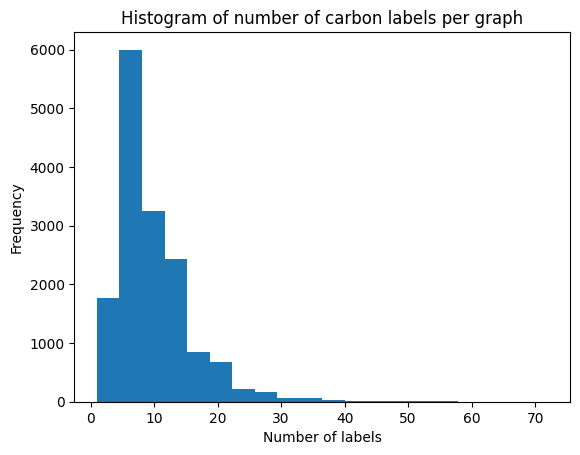

In [33]:
#histogram of number of labels per graph
import matplotlib.pyplot as plt
labels = []
for i in range(len(cnmr_dataset_test)):
    labels.append(np.count_nonzero(cnmr_dataset_test[i][0].ndata['labels'].numpy()))
plt.hist(labels, bins=20)
plt.title('Histogram of number of carbon labels per graph')
plt.xlabel('Number of labels')
plt.ylabel('Frequency')
plt.show()


In [34]:
cnmr_dataset_test.errors

[('2313', 'O([SiH3])[SiH3]', 'list index out of range'),
 ('2113', '[SiH3]I', 'list index out of range'),
 ('1803', '[Si]#[Si]', 'list index out of range'),
 ('3157', '[SiH3][AsH2]', 'list index out of range'),
 ('8598', '[SiH4]', 'list index out of range'),
 ('6166', 'CC(=O)O[Hg]C1=CC=C(C=C1)N', 'list index out of range'),
 ('2706', '[Si][Si](Cl)Cl', 'list index out of range'),
 ('51533',
  '[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[C-]#[O+].[Ru].[Ru].[Ru]',
  'Expect number of features to match number of nodes (len(u)). Got 27 and 24 instead.'),
 ('2854', '[Si]([Si]Br)Br', 'list index out of range'),
 ('2303', '[Si][Si]I', 'list index out of range'),
 ('9351', 'C1=COC=C1[Hg]C2=COC=C2', 'list index out of range'),
 ('9423', 'P.[GeH3]', 'list index out of range'),
 ('2007', '[SiH]', 'list index out of range'),
 ('3480', 'C1=CC(=CC=C1C(=O)O)[Hg]Cl', 'list index out of range'),
 ('9797', 'CC=C[Hg]C=CC', 'list index out 

In [ ]:
#save list of erros in smiles_errors.txt
with open('smiles_errors.txt', 'w') as f:
    for item in cnmr_dataset_test.errors:
        f.write("%s\n" % item)

In [35]:
def map_tensor_values(df, tensor):
    # Convert tensor to numpy for easier manipulation
    # Sort the DataFrame and the tensor values
    #remove 0 and negative values from tensor
    tensor = tensor[tensor > 0.005]
    #number of unique values
    num_of_carbons_from_sim = len(tensor.unique())
    sorted_df = df.sort_values(by='Average Shift')
    #number of values
    num_of_carbons_from_int = len(sorted_df['Average Shift'].unique())
    if num_of_carbons_from_sim != num_of_carbons_from_int:
        print(f"Number of carbons from simulation: {num_of_carbons_from_sim} and number of carbons from integration: {num_of_carbons_from_int}")
    sorted_tensor = np.sort(tensor.numpy().flatten())
    #remove duplicates
    sorted_tensor = np.unique(sorted_tensor)


    map_dict = dict(zip(sorted_tensor,sorted_df['Average Shift'].unique()))
    return map_dict

In [58]:
cnmr_dataset_test[0][0].ndata['labels']

tensor([[ 11.9999],
        [139.8311],
        [135.7121],
        [  0.0000],
        [153.9251],
        [  0.0000],
        [ 51.9089],
        [136.5656],
        [128.3261],
        [128.8877],
        [128.8103],
        [128.8877],
        [128.3261],
        [ 30.7474],
        [ 61.2258],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000],
        [  0.0000]])

In [61]:
cnmr_copy = copy.deepcopy(cnmr_dataset_test)

In [63]:
list_of_errors = []
issues = []
for i in range(len(cnmr_copy)):
    id = cnmr_copy[i][2]

    g = cnmr_copy[i][0]
    flag = 0
    for element in strings:
        if f'{element[0]}' == id:
            exp_data = element[1]
            flag = 1
            break
        
    if flag == 0:
        issues.append(id)
        continue
    #print(exp_data)
    #print(cnmr_copy.labels[i])
    try:    
        shifts_ = parse_shifts(exp_data.split("'shifts': ")[1].replace('\\n','\n').replace('*','').replace('#','').replace('^','').replace('P','').replace('F','')[1:-2])
        shifts_map = map_tensor_values(shifts_, cnmr_copy[i][0].ndata['labels'])
        # cnmr_copy[i][0].ndata['labels'] = torch.tensor([shifts_map[shift.item()] if shift.item() in shifts_map else shift for shift in cnmr_copy[i][0].ndata['labels']])
        # cnmr_copy[i][0].ndata['labels'] = torch.tensor([shifts_map[shift.item()] if shift.item() in shifts_map else -1 for shift in cnmr_copy[i][0].ndata['labels']])  #Trying to weed out errors in mapping 
                                                                                                                                                                       #adding the -1 for missing values
        # cnmr_copy[i][0].ndata['labels'] = torch.tensor([shifts_map[shift.item()] if shift.item() in shifts_map and shift.item() != 0 else -1 for shift in cnmr_copy[i][0].ndata['labels']])
        cnmr_copy[i][0].ndata['labels'] = torch.tensor([shifts_map[shift.item()] if shift.item() in shifts_map else (0 if shift.item() == 0 else -1) for shift in cnmr_copy[i][0].ndata['labels']])

    #print(cnmr_copy.labels[i])
    except Exception as e:
        list_of_errors.append((id,exp_data,str(e)))
        continue


print(len(list_of_errors),'number of errors')
print(list_of_errors[:3])
            

Skipped line:                        12
Number of carbons from simulation: 12 and number of carbons from integration: 11
Number of carbons from simulation: 8 and number of carbons from integration: 4
Number of carbons from simulation: 6 and number of carbons from integration: 12
Skipped line:                         6
Number of carbons from simulation: 9 and number of carbons from integration: 8
Skipped line: 
Skipped line:      Assigned with HMQC and HMBC.
Skipped line:      
Skipped line:      ASSIGNED BY C-H COSY.
Number of carbons from simulation: 9 and number of carbons from integration: 10
Number of carbons from simulation: 13 and number of carbons from integration: 8
Skipped line:                         6
Number of carbons from simulation: 10 and number of carbons from integration: 9
Number of carbons from simulation: 5 and number of carbons from integration: 6
Skipped line:                         7
Skipped line:                        14 
Skipped line:                        

In [38]:
len(list_of_errors)

0

In [55]:
len(issues)

0

In [108]:
data = pd.read_csv('scrape_data_CNMR.csv')
ids = data['sdbsid'].to_list()
for issue in issues:
    if issue in ids:
        print(issue)

In [48]:
indexes = []

print(len(cnmr_copy))
print(len(issues))
for i,element in enumerate(cnmr_copy):
    if element[2] in issues:
        #remove the element
        indexes.append(i)
        # print(element[0].ndata['labels'])
#remove all elements indexed as in index
#sort indexes in descending order
indexes = sorted(indexes, reverse=True)
for index in indexes:
    cnmr_copy.graphs.pop(index)
    cnmr_copy.labels.pop(index)
    cnmr_copy.graph_id.pop(index)

print(len(cnmr_copy))



15542
1832
13710


In [64]:
cnmr_copy[0][0].ndata['labels']    

tensor([ 11.5000, 141.4800, 133.0800,   0.0000, 157.2300,   0.0000,  55.4900,
        136.1400, 127.9200, 129.0600, 128.7000, 129.0600, 127.9200,  29.4000,
         59.4400,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000], dtype=torch.float64)

In [65]:
#For the remaining elements we will look if any label is -1, if so we will remove it
indexes = []
for i,element in enumerate(cnmr_copy):
    if -1 in element[0].ndata['labels'].numpy():
        indexes.append(i)

print(len(indexes))

1829


In [67]:
indexes = sorted(indexes, reverse=True)
print(len(cnmr_copy))
print(len(indexes))
for index in indexes:
    cnmr_copy.graphs.pop(index)
    cnmr_copy.labels.pop(index)
    cnmr_copy.graph_id.pop(index)

print(len(cnmr_copy))



13710
1829
11881


In [73]:
for i in range(25):
    print(cnmr_copy[i][0].ndata['labels'])

tensor([ 11.5000, 141.4800, 133.0800,   0.0000, 157.2300,   0.0000,  55.4900,
        136.1400, 127.9200, 129.0600, 128.7000, 129.0600, 127.9200,  29.4000,
         59.4400,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000], dtype=torch.float64)
tensor([ 29.6000, 203.1800,   0.0000,  45.9300, 131.9100, 135.9800, 128.0600,
        128.8500, 128.0600, 135.9800,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
       dtype=torch.float64)
tensor([ 14.2100,  61.5300,   0.0000, 175.7800,   0.0000,  66.9300,  20.3800,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000], dtype=torch.float64)
tensor([ 53.2600,   0.0000, 105.4000,  39.7200, 137.1100, 129.4500, 128.3200,
        126.3700, 128.3200, 129.4500,   0.0000,  53

In [46]:
15542-1832


13710

In [ ]:
def count_hydrogens(file_content):
    lines = file_content.split('\n')
    hydrogen_count = 0
    atom_section = False
    
    for line in lines:
        if line.startswith('atom'):
            atom_section = True
            continue
        
        if atom_section:
            hydrogen_count += 1
        if atom_section and line.startswith('#####'):
            return hydrogen_count - 1
    if atom_section:
        return 0
    return 0

In [ ]:
#make a histogram of the number of H atoms in the files
import matplotlib.pyplot as plt
counts = []
path = 'example/simulation_out/1H_test_final'
for file in files:
    with open(f'{path}/{file}', 'r') as f:
        file_content = f.read()
    
    count = count_hydrogens(file_content)
    counts.append(count)
plt.hist(counts, bins=20)
#add title and axis labels
plt.title('Number of Hydrogens in Dataset')
plt.xlabel('Number of Hydrogens')
plt.ylabel('Frequency')
plt.show()

[14:06:19] Explicit valence for atom # 7 Br, 3, is greater than permitted


Error in file 13C_15664.csv: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcExactMolWt(NoneType)
did not match C++ signature:
    CalcExactMolWt(RDKit::ROMol mol, bool onlyHeavy=False)


[14:06:19] SMILES Parse Error: syntax error while parsing: 17:06:59,112
[14:06:19] SMILES Parse Error: Failed parsing SMILES '17:06:59,112' for input: '17:06:59,112'
[14:06:19] Explicit valence for atom # 18 Br, 3, is greater than permitted


Error in file log.txt: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcExactMolWt(NoneType)
did not match C++ signature:
    CalcExactMolWt(RDKit::ROMol mol, bool onlyHeavy=False)
Error in file 13C_11345.csv: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcExactMolWt(NoneType)
did not match C++ signature:
    CalcExactMolWt(RDKit::ROMol mol, bool onlyHeavy=False)


[14:06:19] Explicit valence for atom # 11 Br, 3, is greater than permitted


Error in file 13C_23119.csv: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcExactMolWt(NoneType)
did not match C++ signature:
    CalcExactMolWt(RDKit::ROMol mol, bool onlyHeavy=False)


Text(0, 0.5, 'Frequency')

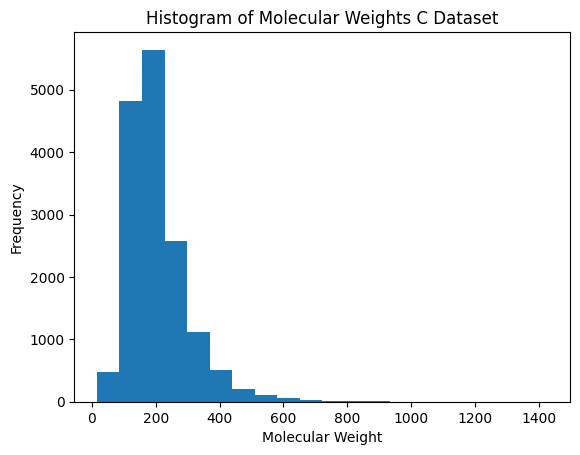

In [125]:
#for each file in the directory, get the molecular weight of the molecule and make a histogram
import os
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
files = os.listdir('example/simulation_out/13C_test_300/')
weights = []
#Smiles are in the first line
for f in files:
    with open(f'example/simulation_out/13C_test_300/{f}', 'r') as file:
        parts = file.read()
    for line in parts.split('\n'):
        smiles = line.strip()
        break

    #get the molecular weight
    try:
        mol = Chem.MolFromSmiles(smiles)
        weight = Descriptors.ExactMolWt(mol)
        weights.append(weight)
    except Exception as e:
        print(f'Error in file {f}: {e}')

plt.hist(weights, bins=20)
plt.title('Histogram of Molecular Weights C Dataset')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')

In [126]:
new_path = '/Users/jorgemedina/Desktop/nmr-to-structure/example/simulation_out/1H_test_final'
files = os.listdir(new_path)
weights = []
#Smiles are in the first line
for f in files:
    with open(f'{new_path}/{f}', 'r') as file:
        parts = file.read()
    for line in parts.split('\n'):
        smiles = line.strip()
        break

    #get the molecular weight
    try:
        mol = Chem.MolFromSmiles(smiles)
        weight = Descriptors.ExactMolWt(mol)
        weights.append(weight)
    except Exception as e:
        print(f'Error in file {f}: {e}')

plt.hist(weights, bins=20)
plt.title('Histogram of Molecular Weights H Dataset')
plt.xlabel('Molecular Weight')


[14:08:02] Explicit valence for atom # 18 Br, 3, is greater than permitted


Error in file 1H_11345.csv: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcExactMolWt(NoneType)
did not match C++ signature:
    CalcExactMolWt(RDKit::ROMol mol, bool onlyHeavy=False)


[14:11:30] Explicit valence for atom # 11 Br, 3, is greater than permitted


Error in file 1H_23119.csv: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcExactMolWt(NoneType)
did not match C++ signature:
    CalcExactMolWt(RDKit::ROMol mol, bool onlyHeavy=False)


KeyboardInterrupt: 

In [128]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_networkx(cnmr_copy[0][0],
                 pos=nx.spring_layout(cnmr_copy[0][1], seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

TypeError: iteration over a 0-d tensor

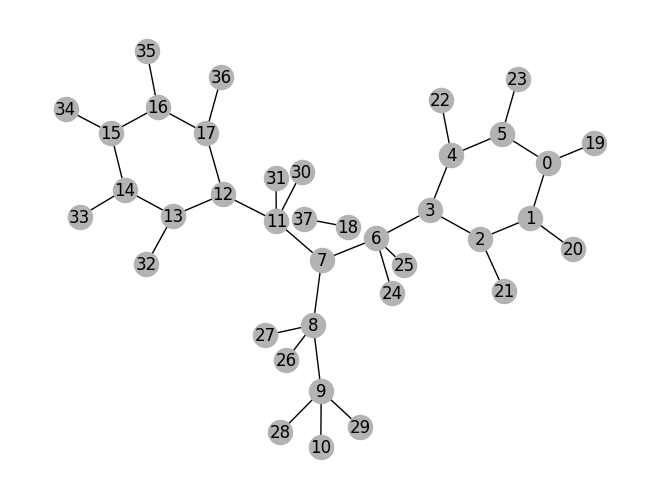

In [482]:
nx_G = cnmr_copy[-3004][0].to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [480]:
cnmr_copy[-3004]

(Graph(num_nodes=38, num_edges=76,
       ndata_schemes={'feature': Scheme(shape=(1,), dtype=torch.float32), 'labels': Scheme(shape=(), dtype=torch.float64)}
       edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.int64)}),
 tensor(0),
 '7539')

In [481]:
cnmr_copy[-3004][0].ndata['labels']

tensor([128.6100, 130.2000, 129.4500, 131.4700, 129.4500, 130.2000,  57.7400,
          0.0000,  52.9200,  36.8800,   0.0000,  57.7400, 131.4700, 129.4500,
        130.2000, 128.6100, 130.2000, 129.4500,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   0.0000,   0.0000], dtype=torch.float64)

In [473]:
print('ID', cnmr_copy[-2013][0])

# print('Nodes',cnmr_copy[0][1].nodes(),sep='\n')
# print('Node Features',cnmr_copy[0][1].ndata['feature'])
# print('labels',cnmr_copy[0][2])
for feature, val in zip(cnmr_copy[-3001][0].ndata['feature'],cnmr_copy[-200][0].nodes()):
    print(val,feature)
    # print(label)

ID Graph(num_nodes=15, num_edges=28,
      ndata_schemes={'feature': Scheme(shape=(1,), dtype=torch.float32), 'labels': Scheme(shape=(), dtype=torch.float64)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.int64)})
tensor(0) tensor([12.0110])
tensor(1) tensor([12.0110])
tensor(2) tensor([12.0110])
tensor(3) tensor([12.0110])
tensor(4) tensor([12.0110])
tensor(5) tensor([12.0110])
tensor(6) tensor([12.0110])
tensor(7) tensor([15.9990])
tensor(8) tensor([15.9990])
tensor(9) tensor([18.9984])
tensor(10) tensor([1.0080])
tensor(11) tensor([1.0080])
tensor(12) tensor([1.0080])
tensor(13) tensor([1.0080])
tensor(14) tensor([1.0080])


In [ ]:
print('ID', cnmr_copy[-2001][1].edges()[0])
print('ID', cnmr_copy[-2001][1].edges()[1])

In [363]:
from dgl.dataloading import DataLoader, Sampler

In [ ]:
len(cnmr_copy[:int(len(cnmr_copy)*0.8)])

In [364]:
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

num_examples = len(cnmr_dataset_test)
num_train = int(num_examples * 0.8)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(
    cnmr_dataset_test, sampler=train_sampler, batch_size=5, drop_last=False)
test_dataloader = GraphDataLoader(
    cnmr_dataset_test, sampler=test_sampler, batch_size=5, drop_last=False)

In [ ]:
num_examples = len(cnmr_dataset_test)
num_train = int(num_examples * 0.8)

train_sampler_sim_nmr = SubsetRandomSampler(torch.arange(num_train))
test_sampler_sim_nmr = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader_sim_nmr = GraphDataLoader(
    cnmr_dataset_test, sampler=train_sampler, batch_size=5, drop_last=False)
test_dataloader_sim_nmr = GraphDataLoader(
    cnmr_dataset_test, sampler=test_sampler, batch_size=5, drop_last=False)

In [133]:
cnmr_dataset_test[1][1]

tensor(0)

In [365]:
it = iter(train_dataloader)
batch = next(it)
print(batch)

[Graph(num_nodes=96, num_edges=190,
      ndata_schemes={'feature': Scheme(shape=(1,), dtype=torch.float32), 'labels': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.int64)}), tensor([0, 0, 0, 0, 0]), ('18421', '1046', '4291', '11604', '19127')]


In [136]:
cnmr_dataset_test[0][0].ndata

{'feature': tensor([[12.0110],
        [12.0110],
        [12.0110],
        [32.0600],
        [12.0110],
        [14.0070],
        [12.0110],
        [12.0110],
        [12.0110],
        [12.0110],
        [12.0110],
        [12.0110],
        [12.0110],
        [12.0110],
        [12.0110],
        [15.9990],
        [35.4500],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080],
        [ 1.0080]]), 'labels': tensor([[ 11.9999],
        [139.8311],
        [135.7121],
        [  0.0000],
        [153.9251],
        [  0.0000],
        [ 51.9089],
        [136.5656],
        [128.3261],
        [128.8877],
        [128.8103],
        [128.8877],
        [128.3261],
        [ 30.7474],
        [ 61.2258],
        [  0.0000],
        [  0.0000],
        [

In [137]:
cnmr_dataset_test[0][0].ndata['feature'].shape[1]

1

# GCN

In [74]:
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, out_feats):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, out_feats)  # Output should be continuous for regression

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)  # No activation for the final layer in regression
        return h
from dgl.nn.pytorch import GraphConv, GlobalAttentionPooling

class GCN2(nn.Module):
    def __init__(self, in_feats, h_feats, out_feats_node, out_feats_graph):
        super(GCN2, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats, allow_zero_in_degree=True)
        self.conv2 = GraphConv(h_feats, h_feats, allow_zero_in_degree=True)  # Shared layers for both tasks
        
        # Node-level regression head
        self.node_head = nn.Linear(h_feats, out_feats_node)
        
        # Graph-level regression head
        #pool only connected nodes
        # self.connected_pool = GlobalAttentionPooling(nn.Linear(h_feats, 1))  # Global pooling for graph-level features
        self.global_pool = GlobalAttentionPooling(nn.Linear(h_feats, 1))  # Global pooling for graph-level features
        self.graph_head = nn.Linear(h_feats, out_feats_graph)
        #atom classification head
        self.atom_head = nn.Linear(h_feats, 92)
        

    def forward(self, g, in_feat):
        # Shared GCN layers
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        h = F.relu(h)
        
        # Node-level regression
        node_out = self.node_head(h)  # Output for node-level regression
        # node level classification
        atom_out = self.atom_head(h)
        #soft max
        atom_out = F.softmax(atom_out, dim=1)
        
        # Graph-level regression
        graph_out = self.global_pool(g, h)  # Apply global pooling to get graph-level features
        graph_out = self.graph_head(graph_out)  # Output for graph-level regression
    
        return node_out, graph_out, atom_out
    

# Create the model with input features, hidden features, and 1 output feature (for node regression)
model_no_pretraining = GCN2(cnmr_dataset_test[0][0].ndata['feature'].shape[1], 16, 1,1)  # Assuming we want to predict 1 continuous value per node
model_pretrain_on_cnmr = GCN2(cnmr_dataset_test[0][0].ndata['feature'].shape[1], 16, 1,1)  # Assuming we want to predict 1 continuous value per node
model_pretrain_on_atom_type = GCN2(cnmr_dataset_test[0][0].ndata['feature'].shape[1], 16, 1,1)  # Assuming we want to predict 1 continuous value per node

In [633]:
model_pretrain_on_sim_nmr = GCN2(cnmr_dataset_test[0][0].ndata['feature'].shape[1], 16, 1,1)  # Assuming we want to predict 1 continuous value per node

In [75]:
model_pretrain_on_exp_nmr = GCN2(cnmr_dataset_test[0][0].ndata['feature'].shape[1], 16, 1,1)  # Assuming we want to predict 1 continuous value per node

In [ ]:
class GCN2(nn.Module):
    def __init__(self, in_feats, h_feats, out_feats_node, out_feats_graph):
        super(GCN2, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats, allow_zero_in_degree=True)
        self.conv2 = GraphConv(h_feats, h_feats, allow_zero_in_degree=True)  # Shared layers for both tasks

        # Node-level regression head
        self.node_head = nn.Linear(h_feats, out_feats_node)

        # Pretraining head for atomic mass prediction
        self.pretrain_head = nn.Linear(h_feats, 1)

        # Graph-level regression head
        self.global_pool = GlobalAttentionPooling(nn.Linear(h_feats, 1))  # Global pooling for graph-level features
        self.graph_head = nn.Linear(h_feats, out_feats_graph)

    def forward(self, g, in_feat, pretrain=False):
        # Shared GCN layers
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        h = F.relu(h)

        if pretrain:
            # Pretraining output for atomic mass prediction
            pretrain_out = self.pretrain_head(h)
            return pretrain_out
        else:
            # Node-level regression
            node_out = self.node_head(h)  # Output for node-level regression

            # Graph-level regression
            graph_out = self.global_pool(g, h)  # Apply global pooling to get graph-level features
            graph_out = self.graph_head(graph_out)  # Output for graph-level regression

            return node_out, graph_out

# Create the model with input features, hidden features, and 1 output feature (for node regression)
model = GCN2(cnmr_dataset_test[0][0].ndata['feature'].shape[1], 16, 1,1)  # Assuming we want to predict 1 continuous value per

In [140]:
batched_graph.ndata['labels'].shape

torch.Size([136, 1])

In [76]:

num_examples = len(cnmr_copy)
num_train = int(num_examples * 0.8)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(
    cnmr_copy, sampler=train_sampler, batch_size=64, drop_last=False)
test_dataloader = GraphDataLoader(
    cnmr_copy, sampler=test_sampler, batch_size=64, drop_last=False)

# num_examples = len(cnmr_copy)
# num_train = int(num_examples * 0.8)

# train_sampler_sim_nmr = SubsetRandomSampler(torch.arange(num_train))
# test_sampler_sim_nmr = SubsetRandomSampler(torch.arange(num_train, num_examples))

# train_dataloader_sim_nmr = GraphDataLoader(
#     cnmr_copy, sampler=train_sampler, batch_size=64, drop_last=False)
# test_dataloader_sim_nmr = GraphDataLoader(
#     cnmr_copy, sampler=test_sampler, batch_size=64, drop_last=False)

Starting training...
Epoch 1/30


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/986180534.py:26: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(g_pred, labels)


Epoch 1 finished, Average Training Loss: 4.9338
Epoch 1 finished, Average Test Loss: 3.9850
Epoch 2/30


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/986180534.py:54: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  test_loss = F.mse_loss(g_pred, labels)


Epoch 2 finished, Average Training Loss: 4.5566
Epoch 2 finished, Average Test Loss: 3.9882
Epoch 3/30
Epoch 3 finished, Average Training Loss: 4.5477
Epoch 3 finished, Average Test Loss: 3.9974
Epoch 4/30
Epoch 4 finished, Average Training Loss: 4.5418
Epoch 4 finished, Average Test Loss: 4.0069
Epoch 5/30
Epoch 5 finished, Average Training Loss: 4.5359
Epoch 5 finished, Average Test Loss: 4.0175
Epoch 6/30
Epoch 6 finished, Average Training Loss: 4.5412
Epoch 6 finished, Average Test Loss: 4.0335
Epoch 7/30
Epoch 7 finished, Average Training Loss: 4.5230
Epoch 7 finished, Average Test Loss: 4.0434
Epoch 8/30
Epoch 8 finished, Average Training Loss: 4.5198
Epoch 8 finished, Average Test Loss: 4.0510
Epoch 9/30
Epoch 9 finished, Average Training Loss: 4.5170
Epoch 9 finished, Average Test Loss: 4.0576
Epoch 10/30
Epoch 10 finished, Average Training Loss: 4.5151
Epoch 10 finished, Average Test Loss: 4.0626
Epoch 11/30
Epoch 11 finished, Average Training Loss: 4.5131
Epoch 11 finished, A

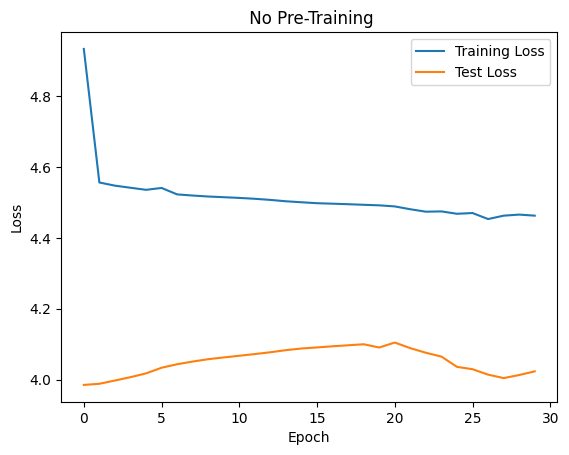

In [613]:


# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_exp_nmr.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, (batched_graph, label) in enumerate(zip(train_data[1],train_data[2])):
        # Add self-loops to the batched graph (if needed)
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        # Forward pass
        node_pred, g_pred, type_pred = model_no_pretraining(batched_graph, batched_graph.ndata['mass'].float())
        
        # Labels and loss calculation (MSE)
        labels = label
        loss = F.mse_loss(g_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_data[1])
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph,label) in enumerate(zip(test_data[1],test_data[2])):
            # Add self-loops to the batched graph (if needed)
            # _batched_graph = dgl.add_self_loop(batched_graph[1])
            
            # Forward pass
            node_pred, g_pred, type_node = model_no_pretraining(batched_graph, batched_graph.ndata['mass'].float())
            
            # Labels and loss calculation (MSE)
            labels = label
            test_loss = F.mse_loss(g_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_data[1])
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")


def train_model(model, train_loader, test_loader, optimizer, num_epochs=30):
    # Lists to store losses
    train_loss_agg = []
    test_loss_agg = []

    # Training
    print("Starting training...")
    for epoch in range(num_epochs):
        total_train_loss = 0
        model.train()  # Set model to training mode
        print(f"Epoch {epoch+1}/{num_epochs}")

        for i, (batched_graph, label) in enumerate(train_loader):
            # Forward pass
            node_pred, g_pred, type_pred = model(batched_graph, batched_graph.ndata['mass'].float())

            # Labels and loss calculation (MSE)
            labels = label
            loss = F.mse_loss(g_pred, labels)

            # Accumulate loss
            total_train_loss += loss.item()

            # Zero gradients, backward pass, and update weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            


# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(' No Pre-Training')
plt.legend()
plt.show()


tensor([[-3.2160]]) tensor([-0.7700])
tensor([[-3.3315]]) tensor([-3.3000])
tensor([[-3.1342]]) tensor([-2.0600])
tensor([[-3.6419]]) tensor([-7.8700])
tensor([[-3.6975]]) tensor([-1.3300])
tensor([[-3.5763]]) tensor([-1.5000])
tensor([[-3.1227]]) tensor([-7.3200])
tensor([[-3.2902]]) tensor([-5.0300])
tensor([[-3.1049]]) tensor([-6.2900])
tensor([[-3.2838]]) tensor([-4.4200])


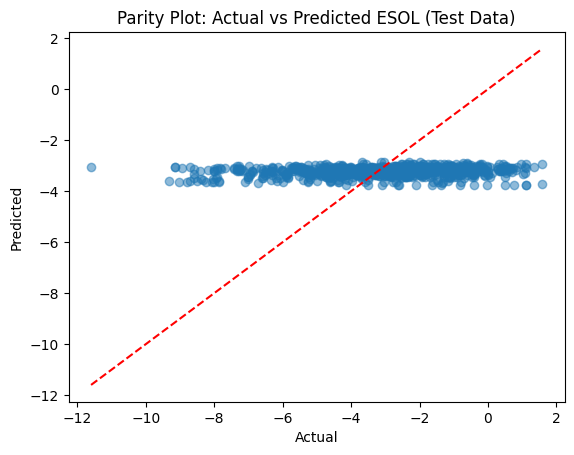

In [622]:
import matplotlib.pyplot as plt

# List to store actual and predicted values for the parity plot
actuals = []
predictions = []

model_no_pretraining.eval()  # Set model to evaluation mode
total_test_loss = 0
with torch.no_grad():
    for i, (batched_graph,label) in enumerate(zip(train_data[1],train_data[2])):
        # Add self-loops to the batched graph (if needed)
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        # Forward pass
        node_pred, g_pred, type_node = model_no_pretraining(batched_graph, batched_graph.ndata['mass'].float())
        
        # Labels and loss calculation (MSE)
        labels = label
   # Labels are the actual values
        if i < 10:
            print(g_pred, labels)
        # Append actual and predicted values for the parity plot
        actuals.extend(labels.cpu().numpy())  # Convert actual values to numpy
        predictions.extend(g_pred.cpu().numpy())  # Convert predicted values to numpy

# Calculate average test loss
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # Line y=x for parity
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Parity Plot: Actual vs Predicted ESOL (Test Data)')
plt.show()

Starting training...
Epoch 1/30
Epoch 1 finished, Average Training Loss: 41.1166
Epoch 1 finished, Average Test Loss: 31.2338
Epoch 2/30
Epoch 2 finished, Average Training Loss: 35.9836
Epoch 2 finished, Average Test Loss: 30.8667
Epoch 3/30
Epoch 3 finished, Average Training Loss: 35.7615
Epoch 3 finished, Average Test Loss: 30.8374
Epoch 4/30
Epoch 4 finished, Average Training Loss: 36.0719
Epoch 4 finished, Average Test Loss: 30.8851
Epoch 5/30
Epoch 5 finished, Average Training Loss: 35.7146
Epoch 5 finished, Average Test Loss: 30.3927
Epoch 6/30
Epoch 6 finished, Average Training Loss: 35.5752
Epoch 6 finished, Average Test Loss: 30.5229
Epoch 7/30
Epoch 7 finished, Average Training Loss: 35.5653
Epoch 7 finished, Average Test Loss: 30.8723
Epoch 8/30
Epoch 8 finished, Average Training Loss: 35.4453
Epoch 8 finished, Average Test Loss: 30.7506
Epoch 9/30
Epoch 9 finished, Average Training Loss: 35.5242
Epoch 9 finished, Average Test Loss: 30.4804
Epoch 10/30
Epoch 10 finished, Ave

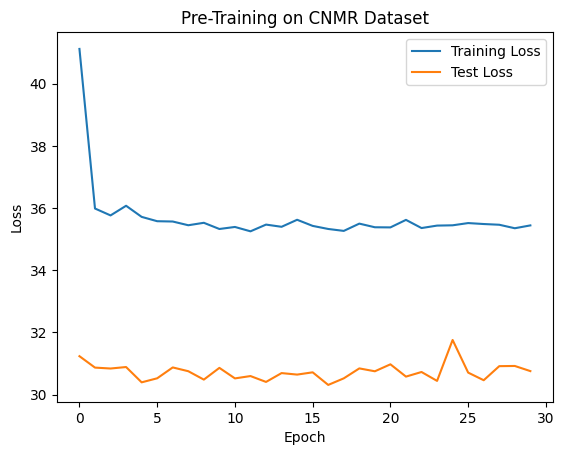

In [614]:
import matplotlib.pyplot as plt

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_cnmr.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model_pretrain_on_cnmr.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, ( batched_graph, labels,ids) in enumerate(train_dataloader):
        # Add self-loops to the batched graph (if needed)
        # batched_graph = dgl.add_self_loop(batched_graph)
        
        # Forward pass
        node_pred, g_pred, node_logs = model_pretrain_on_cnmr(batched_graph, batched_graph.ndata['feature'].float())
        
        # Loss calculation (MSE)
        labels = batched_graph.ndata['feature'].float()
        loss = F.mse_loss(node_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model_pretrain_on_cnmr.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph, labels,ids) in enumerate(test_dataloader):
            # Add self-loops to the batched graph
            # batched_graph = dgl.add_self_loop(batched_graph)
            
            # Forward pass
            node_pred, g_pred, node_logs = model_pretrain_on_cnmr(batched_graph, batched_graph.ndata['feature'].float())
            
            # Loss calculation (MSE)
            labels = batched_graph.ndata['feature'].float()
            test_loss = F.mse_loss(node_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_dataloader)
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Pre-Training on CNMR Dataset')
plt.legend()
plt.show()


Starting training...
Epoch 1/30
Epoch 1 finished, Average Training Loss: 45.5067
Epoch 1 finished, Average Test Loss: 31.9249
Epoch 2/30
Epoch 2 finished, Average Training Loss: 33.3224
Epoch 2 finished, Average Test Loss: 30.2322
Epoch 3/30
Epoch 3 finished, Average Training Loss: 32.8278
Epoch 3 finished, Average Test Loss: 31.2175
Epoch 4/30
Epoch 4 finished, Average Training Loss: 32.8893
Epoch 4 finished, Average Test Loss: 30.2201
Epoch 5/30
Epoch 5 finished, Average Training Loss: 32.8292
Epoch 5 finished, Average Test Loss: 31.1283
Epoch 6/30
Epoch 6 finished, Average Training Loss: 32.7725
Epoch 6 finished, Average Test Loss: 31.6162
Epoch 7/30
Epoch 7 finished, Average Training Loss: 32.6807
Epoch 7 finished, Average Test Loss: 30.0161
Epoch 8/30
Epoch 8 finished, Average Training Loss: 32.6743
Epoch 8 finished, Average Test Loss: 30.2292
Epoch 9/30
Epoch 9 finished, Average Training Loss: 32.7495
Epoch 9 finished, Average Test Loss: 29.8198
Epoch 10/30
Epoch 10 finished, Ave

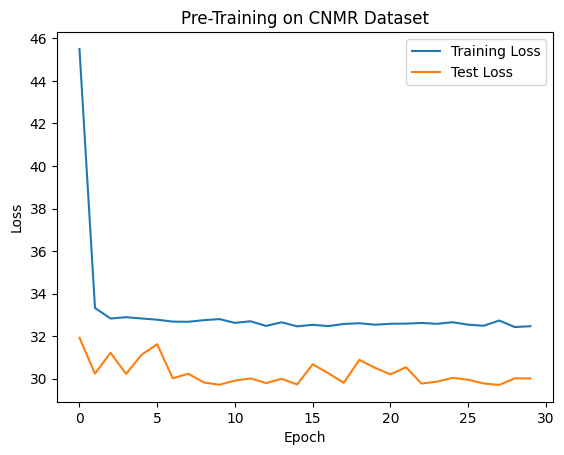

In [77]:

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_exp_nmr.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model_pretrain_on_exp_nmr.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, ( batched_graph, labels,ids) in enumerate(train_dataloader):
        # Add self-loops to the batched graph (if needed)
        # batched_graph = dgl.add_self_loop(batched_graph)
        
        # Forward pass
        node_pred, g_pred, node_logs = model_pretrain_on_exp_nmr(batched_graph, batched_graph.ndata['feature'].float())
        
        # Loss calculation (MSE)
        labels = batched_graph.ndata['feature'].float()
        loss = F.mse_loss(node_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model_pretrain_on_exp_nmr.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph, labels,ids) in enumerate(test_dataloader):
            # Add self-loops to the batched graph
            # batched_graph = dgl.add_self_loop(batched_graph)
            
            # Forward pass
            node_pred, g_pred, node_logs = model_pretrain_on_exp_nmr(batched_graph, batched_graph.ndata['feature'].float())
            
            # Loss calculation (MSE)
            labels = batched_graph.ndata['feature'].float()
            test_loss = F.mse_loss(node_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_dataloader)
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Pre-Training on CNMR Dataset')
plt.legend()
plt.show()


Starting training...
Epoch 1/30
Epoch 1 finished, Average Training Loss: 41.3245
Epoch 1 finished, Average Test Loss: 31.0626
Epoch 2/30
Epoch 2 finished, Average Training Loss: 34.6354
Epoch 2 finished, Average Test Loss: 28.9004
Epoch 3/30
Epoch 3 finished, Average Training Loss: 32.9756
Epoch 3 finished, Average Test Loss: 28.0542
Epoch 4/30
Epoch 4 finished, Average Training Loss: 32.1123
Epoch 4 finished, Average Test Loss: 28.2764
Epoch 5/30
Epoch 5 finished, Average Training Loss: 31.9684
Epoch 5 finished, Average Test Loss: 27.7032
Epoch 6/30
Epoch 6 finished, Average Training Loss: 31.8543
Epoch 6 finished, Average Test Loss: 27.7883
Epoch 7/30
Epoch 7 finished, Average Training Loss: 31.9027
Epoch 7 finished, Average Test Loss: 27.8122
Epoch 8/30
Epoch 8 finished, Average Training Loss: 32.0327
Epoch 8 finished, Average Test Loss: 27.8384
Epoch 9/30
Epoch 9 finished, Average Training Loss: 31.7312
Epoch 9 finished, Average Test Loss: 27.7025
Epoch 10/30
Epoch 10 finished, Ave

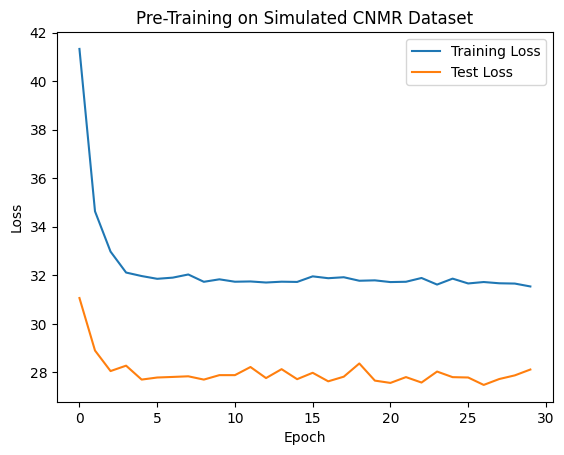

In [634]:
import matplotlib.pyplot as plt

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_sim_nmr.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model_pretrain_on_cnmr.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, ( batched_graph, labels,ids) in enumerate(train_dataloader_sim_nmr):
        # Add self-loops to the batched graph (if needed)
        # batched_graph = dgl.add_self_loop(batched_graph)
        
        # Forward pass
        node_pred, g_pred, node_logs = model_pretrain_on_sim_nmr(batched_graph, batched_graph.ndata['feature'].float())
        
        # Loss calculation (MSE)
        labels = batched_graph.ndata['feature'].float()
        loss = F.mse_loss(node_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_dataloader_sim_nmr)
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model_pretrain_on_sim_nmr.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph, labels,ids) in enumerate(test_dataloader_sim_nmr):
            # Add self-loops to the batched graph
            # batched_graph = dgl.add_self_loop(batched_graph)
            
            # Forward pass
            node_pred, g_pred, node_logs = model_pretrain_on_sim_nmr(batched_graph, batched_graph.ndata['feature'].float())
            
            # Loss calculation (MSE)
            labels = batched_graph.ndata['feature'].float()
            test_loss = F.mse_loss(node_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_dataloader_sim_nmr)
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Pre-Training on Simulated CNMR Dataset')
plt.legend()
plt.show()


In [78]:

smiles_to_g = SMILESToBigraph(node_featurizer=BaseAtomFeaturizer({'mass':atom_mass}))
dataset = ESOL(smiles_to_g)
# Get size of the dataset
print(len(dataset))
num_examples = len(dataset)
num_train = int(num_examples * 0.8)

train_sampler_esol = SubsetRandomSampler(torch.arange(num_train))
test_sampler_esol = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader_esol = GraphDataLoader(
    dataset, sampler=train_sampler, batch_size=64, drop_last=False)
test_dataloader_esol = GraphDataLoader(
    dataset, sampler=test_sampler, batch_size=64, drop_last=False)


Extracting file to /Users/jorgemedina/.dgl/ESOL
Processing dgl graphs from scratch...
Processing molecule 1000/1128
1128


In [79]:
dataset[0]

('OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ',
 Graph(num_nodes=32, num_edges=68,
       ndata_schemes={'mass': Scheme(shape=(1,), dtype=torch.float32)}
       edata_schemes={}),
 tensor([-0.7700]))

In [80]:
train_data = dataset[:num_train]
test_data = dataset[num_train:]

In [606]:
for i, (graph, data) in enumerate(zip(train_data[1],train_data[2])):
    print(graph, data)
    if i ==2:
    
        break

Graph(num_nodes=32, num_edges=68,
      ndata_schemes={'mass': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={}) tensor([-0.7700])
Graph(num_nodes=15, num_edges=32,
      ndata_schemes={'mass': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={}) tensor([-3.3000])
Graph(num_nodes=11, num_edges=20,
      ndata_schemes={'mass': Scheme(shape=(1,), dtype=torch.float32)}
      edata_schemes={}) tensor([-2.0600])


Starting training...
Epoch 1/30


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/143006968.py:26: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(g_pred, labels)


Epoch 1 finished, Average Training Loss: 6.3338
Epoch 1 finished, Average Test Loss: 4.0962
Epoch 2/30


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/143006968.py:54: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  test_loss = F.mse_loss(g_pred, labels)


Epoch 2 finished, Average Training Loss: 4.4808
Epoch 2 finished, Average Test Loss: 4.1224
Epoch 3/30
Epoch 3 finished, Average Training Loss: 4.4803
Epoch 3 finished, Average Test Loss: 4.1236
Epoch 4/30
Epoch 4 finished, Average Training Loss: 4.4806
Epoch 4 finished, Average Test Loss: 4.1238
Epoch 5/30
Epoch 5 finished, Average Training Loss: 4.4807
Epoch 5 finished, Average Test Loss: 4.1239
Epoch 6/30
Epoch 6 finished, Average Training Loss: 4.4807
Epoch 6 finished, Average Test Loss: 4.1239
Epoch 7/30
Epoch 7 finished, Average Training Loss: 4.4807
Epoch 7 finished, Average Test Loss: 4.1239
Epoch 8/30
Epoch 8 finished, Average Training Loss: 4.4807
Epoch 8 finished, Average Test Loss: 4.1239
Epoch 9/30
Epoch 9 finished, Average Training Loss: 4.4808
Epoch 9 finished, Average Test Loss: 4.1239
Epoch 10/30
Epoch 10 finished, Average Training Loss: 4.4808
Epoch 10 finished, Average Test Loss: 4.1239
Epoch 11/30
Epoch 11 finished, Average Training Loss: 4.4808
Epoch 11 finished, A

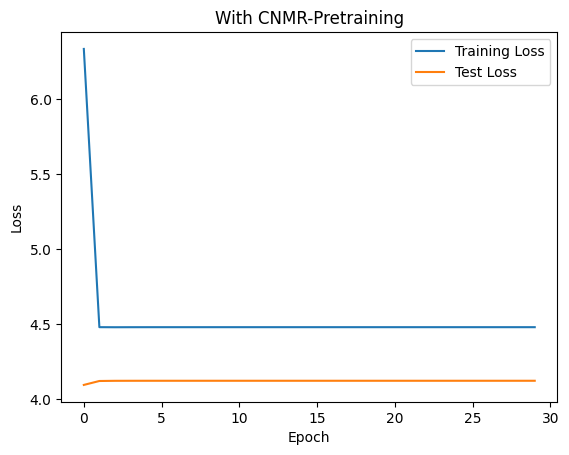

In [615]:
import matplotlib.pyplot as plt

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_cnmr.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, (batched_graph, label) in enumerate(zip(train_data[1],train_data[2])):
        # Add self-loops to the batched graph (if needed)
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        # Forward pass
        node_pred, g_pred, type_pred = model_pretrain_on_cnmr(batched_graph, batched_graph.ndata['mass'].float())
        
        # Labels and loss calculation (MSE)
        labels = label
        loss = F.mse_loss(g_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_data[1])
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph,label) in enumerate(zip(test_data[1],test_data[2])):
            # Add self-loops to the batched graph (if needed)
            # _batched_graph = dgl.add_self_loop(batched_graph[1])
            
            # Forward pass
            node_pred, g_pred, type_node = model_pretrain_on_cnmr(batched_graph, batched_graph.ndata['mass'].float())
            
            # Labels and loss calculation (MSE)
            labels = label
            test_loss = F.mse_loss(g_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_data[1])
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('With CNMR-Pretraining')
plt.legend()
plt.show()


Starting training...
Epoch 1/30


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/2128677208.py:26: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(g_pred, labels)


Epoch 1 finished, Average Training Loss: 4.7468
Epoch 1 finished, Average Test Loss: 3.8954
Epoch 2/30


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/2128677208.py:54: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  test_loss = F.mse_loss(g_pred, labels)


Epoch 2 finished, Average Training Loss: 4.3810
Epoch 2 finished, Average Test Loss: 3.9380
Epoch 3/30
Epoch 3 finished, Average Training Loss: 4.3754
Epoch 3 finished, Average Test Loss: 3.8946
Epoch 4/30
Epoch 4 finished, Average Training Loss: 4.3267
Epoch 4 finished, Average Test Loss: 3.7990
Epoch 5/30
Epoch 5 finished, Average Training Loss: 4.2832
Epoch 5 finished, Average Test Loss: 3.7487
Epoch 6/30
Epoch 6 finished, Average Training Loss: 4.2555
Epoch 6 finished, Average Test Loss: 3.7225
Epoch 7/30
Epoch 7 finished, Average Training Loss: 4.1974
Epoch 7 finished, Average Test Loss: 3.7099
Epoch 8/30
Epoch 8 finished, Average Training Loss: 4.1345
Epoch 8 finished, Average Test Loss: 3.4920
Epoch 9/30
Epoch 9 finished, Average Training Loss: 4.0606
Epoch 9 finished, Average Test Loss: 3.4476
Epoch 10/30
Epoch 10 finished, Average Training Loss: 3.9999
Epoch 10 finished, Average Test Loss: 3.4521
Epoch 11/30
Epoch 11 finished, Average Training Loss: 3.9878
Epoch 11 finished, A

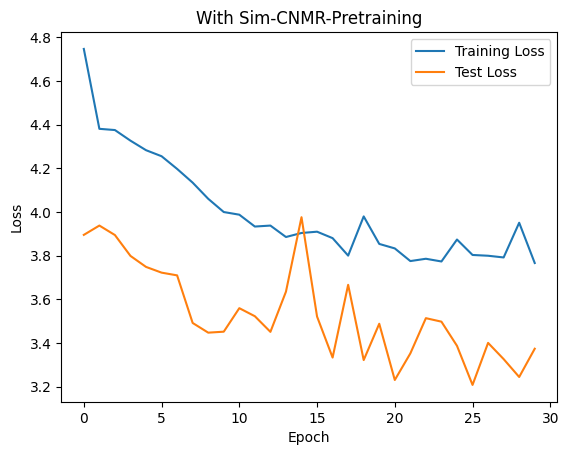

In [635]:
import matplotlib.pyplot as plt

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_sim_nmr.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, (batched_graph, label) in enumerate(zip(train_data[1],train_data[2])):
        # Add self-loops to the batched graph (if needed)
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        # Forward pass
        node_pred, g_pred, type_pred = model_pretrain_on_sim_nmr(batched_graph, batched_graph.ndata['mass'].float())
        
        # Labels and loss calculation (MSE)
        labels = label
        loss = F.mse_loss(g_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_data[1])
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph,label) in enumerate(zip(test_data[1],test_data[2])):
            # Add self-loops to the batched graph (if needed)
            # _batched_graph = dgl.add_self_loop(batched_graph[1])
            
            # Forward pass
            node_pred, g_pred, type_node = model_pretrain_on_sim_nmr(batched_graph, batched_graph.ndata['mass'].float())
            
            # Labels and loss calculation (MSE)
            labels = label
            test_loss = F.mse_loss(g_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_data[1])
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('With Sim-CNMR-Pretraining')
plt.legend()
plt.show()


Starting training...
Epoch 1/30
tensor([-0.7700]) tensor([[-3.1240]], grad_fn=<AddmmBackward0>)
tensor([-3.3000]) tensor([[-3.1140]], grad_fn=<AddmmBackward0>)
tensor([-2.0600]) tensor([[-3.1079]], grad_fn=<AddmmBackward0>)


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_50870/1993370576.py:28: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(g_pred, labels)


Epoch 1 finished, Average Training Loss: 4.4806


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_50870/1993370576.py:56: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  test_loss = F.mse_loss(g_pred, labels)


Epoch 1 finished, Average Test Loss: 4.1238
Epoch 2/30
tensor([-0.7700]) tensor([[-3.1237]], grad_fn=<AddmmBackward0>)
tensor([-3.3000]) tensor([[-3.1237]], grad_fn=<AddmmBackward0>)
tensor([-2.0600]) tensor([[-3.1238]], grad_fn=<AddmmBackward0>)
Epoch 2 finished, Average Training Loss: 4.4808
Epoch 2 finished, Average Test Loss: 4.1239
Epoch 3/30
tensor([-0.7700]) tensor([[-3.1240]], grad_fn=<AddmmBackward0>)
tensor([-3.3000]) tensor([[-3.1240]], grad_fn=<AddmmBackward0>)
tensor([-2.0600]) tensor([[-3.1241]], grad_fn=<AddmmBackward0>)
Epoch 3 finished, Average Training Loss: 4.4808
Epoch 3 finished, Average Test Loss: 4.1239
Epoch 4/30
tensor([-0.7700]) tensor([[-3.1240]], grad_fn=<AddmmBackward0>)
tensor([-3.3000]) tensor([[-3.1240]], grad_fn=<AddmmBackward0>)
tensor([-2.0600]) tensor([[-3.1241]], grad_fn=<AddmmBackward0>)
Epoch 4 finished, Average Training Loss: 4.4808
Epoch 4 finished, Average Test Loss: 4.1239
Epoch 5/30
tensor([-0.7700]) tensor([[-3.1240]], grad_fn=<AddmmBackward

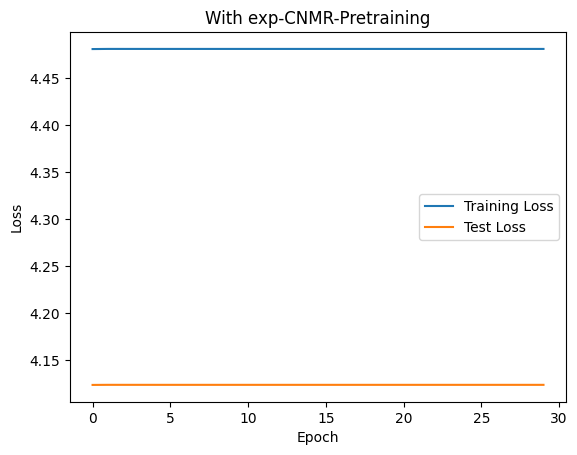

In [86]:
import matplotlib.pyplot as plt

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_exp_nmr.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model_pretrain_on_exp_nmr.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, (batched_graph, label) in enumerate(zip(train_data[1],train_data[2])):
        # Add self-loops to the batched graph (if needed)
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        # Forward pass
        node_pred, g_pred, type_pred = model_pretrain_on_exp_nmr(batched_graph, batched_graph.ndata['mass'].float())
        
        # Labels and loss calculation (MSE)
        labels = label
        if i < 3:
            print(labels,g_pred)
        loss = F.mse_loss(g_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_data[1])
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model_pretrain_on_exp_nmr.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph,label) in enumerate(zip(test_data[1],test_data[2])):
            # Add self-loops to the batched graph (if needed)
            # _batched_graph = dgl.add_self_loop(batched_graph[1])
            
            # Forward pass
            node_pred, g_pred, type_node = model_pretrain_on_exp_nmr(batched_graph, batched_graph.ndata['mass'].float())
            
            # Labels and loss calculation (MSE)
            labels = label
            test_loss = F.mse_loss(g_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_data[1])
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('With exp-CNMR-Pretraining')
plt.legend()
plt.show()


In [85]:
print(labels,g_pred[0])

tensor([-4.5220]) tensor([-3.1240])


Starting training...
Epoch 1/30
Epoch 1 finished, Average Training Loss: 4.0773
Epoch 1 finished, Average Test Loss: 4.0526
Epoch 2/30
Epoch 2 finished, Average Training Loss: 4.0480
Epoch 2 finished, Average Test Loss: 4.0533
Epoch 3/30
Epoch 3 finished, Average Training Loss: 4.0475
Epoch 3 finished, Average Test Loss: 4.0520
Epoch 4/30
Epoch 4 finished, Average Training Loss: 4.0474
Epoch 4 finished, Average Test Loss: 4.0522
Epoch 5/30
Epoch 5 finished, Average Training Loss: 4.0472
Epoch 5 finished, Average Test Loss: 4.0518
Epoch 6/30
Epoch 6 finished, Average Training Loss: 4.0471
Epoch 6 finished, Average Test Loss: 4.0516
Epoch 7/30
Epoch 7 finished, Average Training Loss: 4.0469
Epoch 7 finished, Average Test Loss: 4.0520
Epoch 8/30
Epoch 8 finished, Average Training Loss: 4.0471
Epoch 8 finished, Average Test Loss: 4.0522
Epoch 9/30
Epoch 9 finished, Average Training Loss: 4.0470
Epoch 9 finished, Average Test Loss: 4.0517
Epoch 10/30
Epoch 10 finished, Average Training Loss

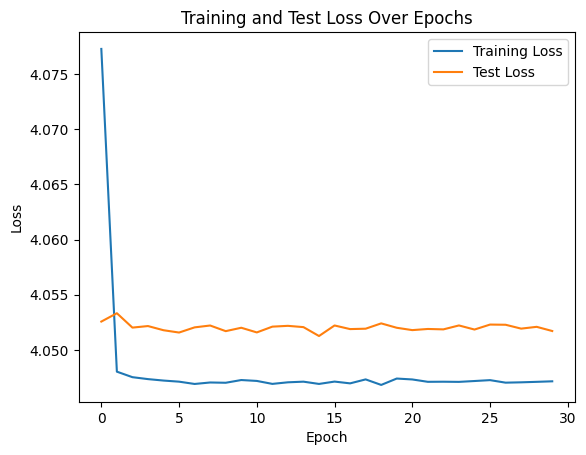

ValueError: x and y must be the same size

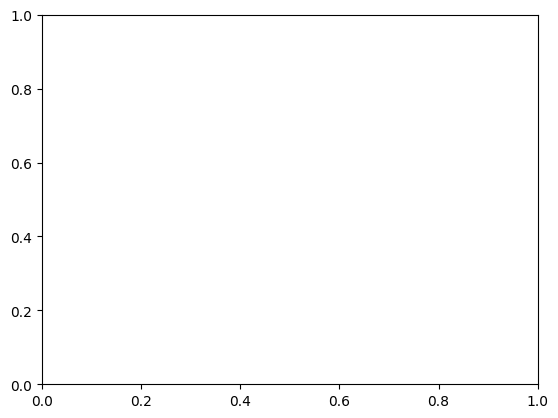

In [623]:
import matplotlib.pyplot as plt

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_atom_type.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model_pretrain_on_atom_type.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, (batched_graph, labels, ids) in enumerate(train_dataloader):
        # Add self-loops to the batched graph (if needed)
        # batched_graph = dgl.add_self_loop(batched_graph)

        # Forward pass
        node_pred, g_pred, node_logs = model_pretrain_on_atom_type(batched_graph, batched_graph.ndata['feature'].float())
        
        # Labels and loss calculation (Cross Entropy)
        labels = batched_graph.ndata['atom_type'].float()
        loss = F.cross_entropy(node_logs, labels)

        # Accumulate training loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")

    # Validation/Test after each epoch
    model_pretrain_on_atom_type.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph, labels, ids) in enumerate(test_dataloader):
            # Add self-loops to the batched graph (if needed)
            # batched_graph = dgl.add_self_loop(batched_graph)
            
            # Forward pass
            node_pred, g_pred, atom_pred = model_pretrain_on_atom_type(batched_graph, batched_graph.ndata['feature'].float())
            
            # Labels and loss calculation (Cross Entropy)
            labels = batched_graph.ndata['atom_type'].float()
            test_loss = F.cross_entropy(atom_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()

    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_dataloader)
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss curves
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Parity plot (Predicted vs Actual on the test set)
actuals = []
predictions = []

with torch.no_grad():
    for i, (batched_graph, labels, ids) in enumerate(test_dataloader):
        # Forward pass
        node_pred, g_pred, atom_pred = model_pretrain_on_atom_type(batched_graph, batched_graph.ndata['feature'].float())

        # Labels are the actual values
        labels = batched_graph.ndata['atom_type'].float()

        # Append actual and predicted values for parity plot
        actuals.extend(labels.cpu().numpy())  # Convert actual values to numpy
        predictions.extend(atom_pred.argmax(1).cpu().numpy())  # Convert predicted values to numpy

# Plot parity plot
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')  # Line y=x for parity
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Parity Plot: Actual vs Predicted Atom Types (Test Data)')
plt.show()


Starting training...
Epoch 1/30


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/3324876710.py:26: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(g_pred, labels)


Epoch 1 finished, Average Training Loss: 4.9533


/var/folders/cm/sn2bpgln3zdc0lh8s2384hr40000gn/T/ipykernel_1561/3324876710.py:54: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  test_loss = F.mse_loss(g_pred, labels)


Epoch 1 finished, Average Test Loss: 3.9924
Epoch 2/30
Epoch 2 finished, Average Training Loss: 4.5344
Epoch 2 finished, Average Test Loss: 4.0228
Epoch 3/30
Epoch 3 finished, Average Training Loss: 4.5190
Epoch 3 finished, Average Test Loss: 4.0369
Epoch 4/30
Epoch 4 finished, Average Training Loss: 4.5122
Epoch 4 finished, Average Test Loss: 4.0463
Epoch 5/30
Epoch 5 finished, Average Training Loss: 4.5084
Epoch 5 finished, Average Test Loss: 4.0533
Epoch 6/30
Epoch 6 finished, Average Training Loss: 4.5064
Epoch 6 finished, Average Test Loss: 4.0594
Epoch 7/30
Epoch 7 finished, Average Training Loss: 4.5048
Epoch 7 finished, Average Test Loss: 4.0650
Epoch 8/30
Epoch 8 finished, Average Training Loss: 4.5033
Epoch 8 finished, Average Test Loss: 4.0701
Epoch 9/30
Epoch 9 finished, Average Training Loss: 4.5022
Epoch 9 finished, Average Test Loss: 4.0746
Epoch 10/30
Epoch 10 finished, Average Training Loss: 4.5014
Epoch 10 finished, Average Test Loss: 4.0783
Epoch 11/30
Epoch 11 finis

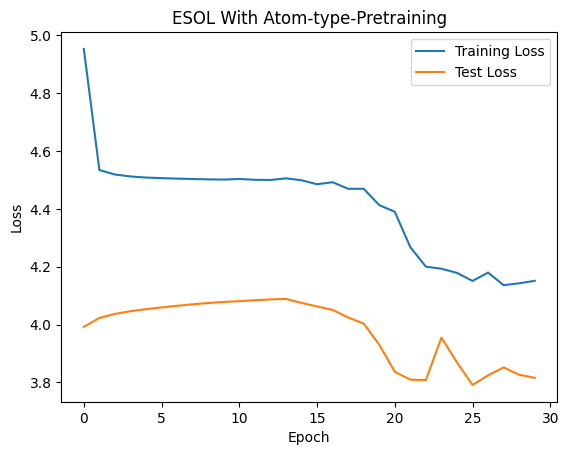

In [630]:
import matplotlib.pyplot as plt

# Optimizer
optimizer = torch.optim.Adam(model_pretrain_on_atom_type.parameters(), lr=0.01)

# Lists to store losses
train_loss_agg = []
test_loss_agg = []

# Training
print("Starting training...")
for epoch in range(30):
    total_train_loss = 0
    model.train()  # Set model to training mode
    print(f"Epoch {epoch+1}/{30}")
    
    for i, (batched_graph, label) in enumerate(zip(train_data[1],train_data[2])):
        # Add self-loops to the batched graph (if needed)
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        # Forward pass
        node_pred, g_pred, type_pred = model_pretrain_on_atom_type(batched_graph, batched_graph.ndata['mass'].float())
        
        # Labels and loss calculation (MSE)
        labels = label
        loss = F.mse_loss(g_pred, labels)
        
        # Accumulate loss
        total_train_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss for the epoch
    avg_train_loss = total_train_loss / len(train_data[1])
    train_loss_agg.append(avg_train_loss)
    print(f"Epoch {epoch+1} finished, Average Training Loss: {avg_train_loss:.4f}")
    
    # Validation/Test after each epoch
    model.eval()  # Set model to evaluation mode
    total_test_loss = 0
    with torch.no_grad():
        for i, (batched_graph,label) in enumerate(zip(test_data[1],test_data[2])):
            # Add self-loops to the batched graph (if needed)
            # _batched_graph = dgl.add_self_loop(batched_graph[1])
            
            # Forward pass
            node_pred, g_pred, type_node = model_pretrain_on_atom_type(batched_graph, batched_graph.ndata['mass'].float())
            
            # Labels and loss calculation (MSE)
            labels = label
            test_loss = F.mse_loss(g_pred, labels)
            
            # Accumulate test loss
            total_test_loss += test_loss.item()
    
    # Calculate average test loss
    avg_test_loss = total_test_loss / len(test_data[1])
    test_loss_agg.append(avg_test_loss)
    print(f"Epoch {epoch+1} finished, Average Test Loss: {avg_test_loss:.4f}")

# Plot training and test loss
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ESOL With Atom-type-Pretraining')
plt.legend()
plt.show()



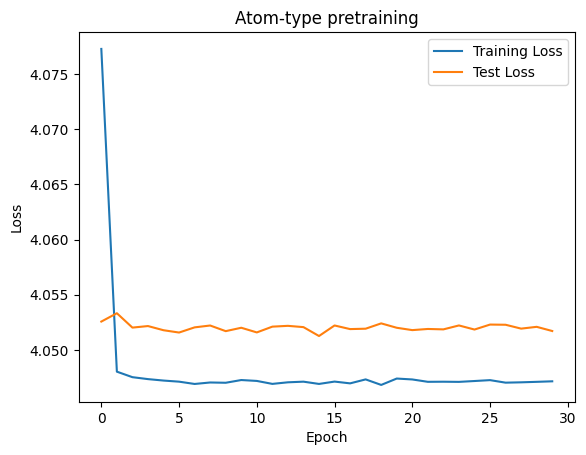

In [624]:
plt.plot(train_loss_agg, label='Training Loss')
plt.plot(test_loss_agg, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Atom-type pretraining')
plt.legend()
plt.show()

Starting training...
Epoch 1/20
Epoch 1 finished, Average Loss: 3.6726
Epoch 2/20
Epoch 2 finished, Average Loss: 3.6728
Epoch 3/20
Epoch 3 finished, Average Loss: 3.6726
Epoch 4/20
Epoch 4 finished, Average Loss: 3.6727
Epoch 5/20
Epoch 5 finished, Average Loss: 3.6725
Epoch 6/20
Epoch 6 finished, Average Loss: 3.6727
Epoch 7/20
Epoch 7 finished, Average Loss: 3.6723
Epoch 8/20
Epoch 8 finished, Average Loss: 3.6726
Epoch 9/20
Epoch 9 finished, Average Loss: 3.6728
Epoch 10/20
Epoch 10 finished, Average Loss: 3.6726
Epoch 11/20
Epoch 11 finished, Average Loss: 3.6725
Epoch 12/20
Epoch 12 finished, Average Loss: 3.6726
Epoch 13/20
Epoch 13 finished, Average Loss: 3.6726
Epoch 14/20
Epoch 14 finished, Average Loss: 3.6724
Epoch 15/20
Epoch 15 finished, Average Loss: 3.6726
Epoch 16/20
Epoch 16 finished, Average Loss: 3.6729
Epoch 17/20
Epoch 17 finished, Average Loss: 3.6726
Epoch 18/20
Epoch 18 finished, Average Loss: 3.6727
Epoch 19/20
Epoch 19 finished, Average Loss: 3.6724
Epoch 20/

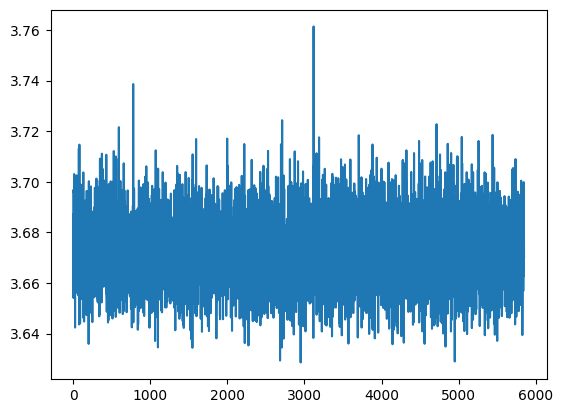

In [526]:
# Create the model with given dimensions
optimizer = torch.optim.Adam(model_pretrain_on_atom_type.parameters(), lr=0.01)

print("Starting training...")
loss_agg = []
for epoch in range(30):
    total_loss = 0
    print(f"Epoch {epoch+1}/{20}")
    
    for i, (batched_graph, labels, ids) in enumerate(train_dataloader):
        # Add self-loops to the batched graph
        # batched_graph = dgl.add_self_loop(batched_graph)
        
        node_pred,g_pred,node_logs  = model_pretrain_on_atom_type(batched_graph, batched_graph.ndata['feature'].float())
        labels = batched_graph.ndata['atom_type'].float()

        # print(node_logs.shape, labels.shape)
        loss = F.cross_entropy(node_logs, labels)
        loss_agg.append(loss.item())
        total_loss += loss.item()

        # labels = batched_graph.ndata['feature'].float()
        # loss = F.mse_loss(node_pred, labels)
        # loss_agg.append(loss.item())
        # total_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress for each batch
        # if (i+1) % 10 == 0:
        #     print(f"  Batch {i+1}, Loss: {loss.item():.4f}")

    # Print the average loss for the epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1} finished, Average Loss: {avg_loss:.4f}")

print("Training completed. Starting testing...")
plt.plot(loss_agg)
# Testing loop
total_loss = 0
num_tests = 0

for i, (batched_graph, labels, ids) in enumerate(test_dataloader):
    # Add self-loops to the batched graph
    batched_graph = dgl.add_self_loop(batched_graph)
    
    node_pred, g_pred, atom_pred = model_pretrain_on_atom_type(batched_graph, batched_graph.ndata['labels'].float())
    #       #cross entropy loss
    # labels = batched_graph.ndata['atom_type'].float()
    # loss = F.cross_entropy(atom_pred, labels)
    # loss_agg.append(loss.item())
    # total_loss += loss.item()
        
    labels = batched_graph.ndata['feature'].float()
    mse = F.mse_loss(node_pred, labels)

    total_loss += loss
    num_tests += len(labels)

    # Print progress for each batch
    if (i+1) % 10 == 0:
        print(f"  Testing Batch {i+1}/{len(test_dataloader)}")

# Calculate and print test accuracy
test_loss = total_loss / num_tests
print(f"Test accuracy: {test_loss:.4f}")

#parity plot in test set 



'FC(F)(F)c1ccccc1'

In [ ]:
import torch

In [ ]:
print(torch.__version__)

In [573]:
smiles_to_g = SMILESToBigraph(node_featurizer=BaseAtomFeaturizer({'mass':atom_mass}))
dataset = ESOL(smiles_to_g)
# Get size of the dataset
len(dataset)

Extracting file to /Users/jorgemedina/.dgl/ESOL
Processing dgl graphs from scratch...
Processing molecule 1000/1128


1128

In [574]:
dataset[0]

('OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ',
 Graph(num_nodes=32, num_edges=68,
       ndata_schemes={'mass': Scheme(shape=(1,), dtype=torch.float32)}
       edata_schemes={}),
 tensor([-0.7700]))

In [575]:
dataset[0][2]

tensor([-0.7700])

In [580]:
num_examples = len(dataset)
num_train = int(num_examples * 0.8)

train_sampler_esol = SubsetRandomSampler(torch.arange(num_train))
test_sampler_esol = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader_esol = GraphDataLoader(
    dataset, sampler=train_sampler, batch_size=32, drop_last=False)
test_dataloader_esol = GraphDataLoader(
    dataset, sampler=test_sampler, batch_size=32, drop_last=False)


In [582]:
next(train_dataloader_esol)

TypeError: 'GraphDataLoader' object is not an iterator

Starting training...
Epoch 1/20
Epoch 1 finished, Average Loss: 5.5976
Epoch 2/20
Epoch 2 finished, Average Loss: 4.7031
Epoch 3/20
Epoch 3 finished, Average Loss: 4.3624
Epoch 4/20
Epoch 4 finished, Average Loss: 4.5288
Epoch 5/20
Epoch 5 finished, Average Loss: 4.4422
Epoch 6/20
Epoch 6 finished, Average Loss: 4.1408
Epoch 7/20
Epoch 7 finished, Average Loss: 4.1002
Epoch 8/20
Epoch 8 finished, Average Loss: 4.0768
Epoch 9/20
Epoch 9 finished, Average Loss: 4.2957
Epoch 10/20
Epoch 10 finished, Average Loss: 4.3520
Epoch 11/20
Epoch 11 finished, Average Loss: 4.1310
Epoch 12/20
Epoch 12 finished, Average Loss: 4.0303
Epoch 13/20
Epoch 13 finished, Average Loss: 4.0746
Epoch 14/20
Epoch 14 finished, Average Loss: 4.0773
Epoch 15/20
Epoch 15 finished, Average Loss: 4.1008
Epoch 16/20
Epoch 16 finished, Average Loss: 4.4787
Epoch 17/20
Epoch 17 finished, Average Loss: 4.0050
Epoch 18/20
Epoch 18 finished, Average Loss: 4.3050
Epoch 19/20
Epoch 19 finished, Average Loss: 4.8602
Epoch 20/

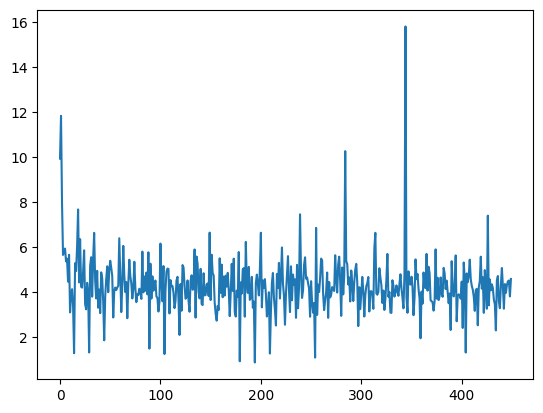

In [378]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("Starting training...")
loss_agg = []
for epoch in range(30):
    total_loss = 0
    print(f"Epoch {epoch+1}/{20}")
    
    for i, batched_graph in enumerate(train_dataloader_esol):
        # Add self-loops to the batched graph
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        node_pred,g_pred,type_pred  = model3(batched_graph[1], batched_graph[1].ndata['mass'].float())
        # print(batched_graph[2])
        labels = batched_graph[2]
        loss = F.mse_loss(g_pred, labels)
        loss_agg.append(loss.item())
        total_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress for each batch
        # if (i+1) % 10 == 0:
        #     print(f"  Batch {i+1}, Loss: {loss.item():.4f}")

    # Print the average loss for the epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1} finished, Average Loss: {avg_loss:.4f}")

print("Training completed. Starting testing...")
plt.plot(loss_agg)
# Testing loop
total_loss = 0
num_tests = 0

for i, batched_graph in enumerate(test_dataloader_esol):
    # Add self-loops to the batched graph
    # print(batched_graph)
    # _batched_graph = dgl.add_self_loop(batched_graph[1])
    
    node_pred,g_pred,type_node  = model3(batched_graph[1], batched_graph[1].ndata['mass'].float())
    labels = batched_graph[2]
    if i == 1:
        print('predictions',g_pred)
        print('labels:',labels)
    mse = F.mse_loss(g_pred, labels)

    total_loss += (node_pred.argmax(1) == labels).sum().item()
    num_tests += len(labels)

    # Print progress for each batch
    if (i+1) % 10 == 0:
        print(f"  Testing Batch {i+1}/{len(test_dataloader)}")

# Calculate and print test accuracy
test_loss = total_loss / num_tests
print(f"Test accuracy: {test_loss:.4f}")

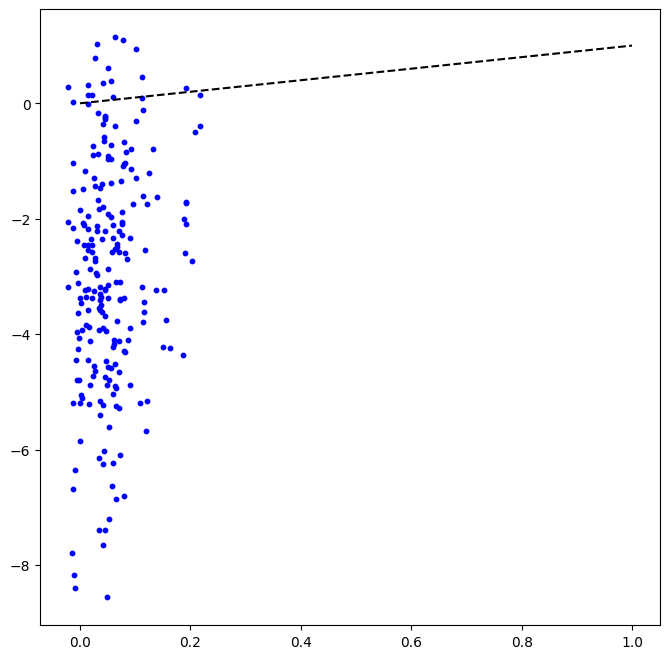

In [540]:
#make a parity plot on the testing data for ESOL and model predictions
import matplotlib.pyplot as plt

# Get the testing data
test_data = []
for i, batched_graph in enumerate(test_dataloader):
    test_data.append((batched_graph[1], batched_graph[2]))
    if i == 10:
        break

# Get the model predictions
model.eval()
model_predictions = []
for i, (batched_graph, labels) in enumerate(test_data):
    with torch.no_grad():
        node_pred,g_pred,n_type  = model3(batched_graph, batched_graph.ndata['mass'].float())
        model_predictions.append((node_pred, g_pred, labels))

# Plot the parity plot
plt.figure(figsize=(8, 8))
for node_pred, g_pred, labels in model_predictions:
    plt.scatter(g_pred,labels, c='b', s=10)
plt.plot([0, 1], [0, 1], 'k--')


Starting training...
Epoch 1/20
Epoch 1 finished, Average Loss: 13.8827
Epoch 2/20
Epoch 2 finished, Average Loss: 13.9775
Epoch 3/20
Epoch 3 finished, Average Loss: 14.0178
Epoch 4/20
Epoch 4 finished, Average Loss: 14.3634
Epoch 5/20
Epoch 5 finished, Average Loss: 14.5098
Epoch 6/20
Epoch 6 finished, Average Loss: 14.2993
Epoch 7/20
Epoch 7 finished, Average Loss: 13.5522
Epoch 8/20
Epoch 8 finished, Average Loss: 14.2553
Epoch 9/20
Epoch 9 finished, Average Loss: 14.3352
Epoch 10/20
Epoch 10 finished, Average Loss: 14.4063
Epoch 11/20
Epoch 11 finished, Average Loss: 14.1708
Epoch 12/20
Epoch 12 finished, Average Loss: 13.8468
Epoch 13/20
Epoch 13 finished, Average Loss: 13.5671
Epoch 14/20
Epoch 14 finished, Average Loss: 14.4522
Epoch 15/20
Epoch 15 finished, Average Loss: 13.6205
Epoch 16/20
Epoch 16 finished, Average Loss: 14.5195
Epoch 17/20
Epoch 17 finished, Average Loss: 14.0365
Epoch 18/20
Epoch 18 finished, Average Loss: 14.0510
Epoch 19/20
Epoch 19 finished, Average Loss

ValueError: too many values to unpack (expected 2)

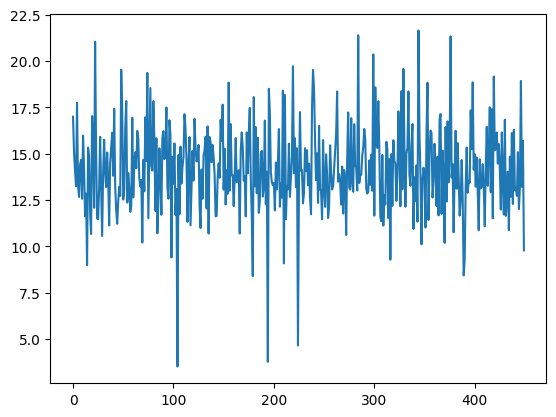

In [537]:
## Pretrained on atom type prediction
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("Starting training...")
loss_agg = []
for epoch in range(30):
    total_loss = 0
    print(f"Epoch {epoch+1}/{20}")
    
    for i, batched_graph in enumerate(train_dataloader):
        # Add self-loops to the batched graph
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        node_pred,g_pred,type_pred  = model3(batched_graph[1], batched_graph[1].ndata['mass'].float())
        # print(batched_graph[2])
        labels = batched_graph[2]
        loss = F.mse_loss(g_pred, labels)
        loss_agg.append(loss.item())
        total_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress for each batch
        # if (i+1) % 10 == 0:
        #     print(f"  Batch {i+1}, Loss: {loss.item():.4f}")

    # Print the average loss for the epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1} finished, Average Loss: {avg_loss:.4f}")

print("Training completed. Starting testing...")
plt.plot(loss_agg)
# Testing loop
total_loss = 0
num_tests = 0

for i, batched_graph in enumerate(test_dataloader):
    # Add self-loops to the batched graph
    # print(batched_graph)
    # _batched_graph = dgl.add_self_loop(batched_graph[1])
    
    node_pred,g_pred,type_pred  = model(batched_graph[1], batched_graph[1].ndata['mass'].float())
    labels = batched_graph[2]
    if i == 1:
        print('predictions',g_pred)
        print('labels:',labels)
    mse = F.mse_loss(g_pred, labels)

    total_loss += (node_pred.argmax(1) == labels).sum().item()
    num_tests += len(labels)

    # Print progress for each batch
    if (i+1) % 10 == 0:
        print(f"  Testing Batch {i+1}/{len(test_dataloader)}")

# Calculate and print test accuracy
test_loss = total_loss / num_tests
print(f"Test accuracy: {test_loss:.4f}")

Starting training...
Epoch 1/20
Epoch 1 finished, Average Loss: 13.9073
Epoch 2/20
Epoch 2 finished, Average Loss: 14.0828
Epoch 3/20
Epoch 3 finished, Average Loss: 13.7912
Epoch 4/20
Epoch 4 finished, Average Loss: 14.2121
Epoch 5/20
Epoch 5 finished, Average Loss: 13.9009
Epoch 6/20
Epoch 6 finished, Average Loss: 15.2031
Epoch 7/20
Epoch 7 finished, Average Loss: 13.9459
Epoch 8/20
Epoch 8 finished, Average Loss: 14.8552
Epoch 9/20
Epoch 9 finished, Average Loss: 14.0669
Epoch 10/20
Epoch 10 finished, Average Loss: 15.0144
Epoch 11/20
Epoch 11 finished, Average Loss: 13.7121
Epoch 12/20
Epoch 12 finished, Average Loss: 14.7194
Epoch 13/20
Epoch 13 finished, Average Loss: 14.7559
Epoch 14/20
Epoch 14 finished, Average Loss: 13.6840
Epoch 15/20
Epoch 15 finished, Average Loss: 14.0430
Epoch 16/20
Epoch 16 finished, Average Loss: 14.2009
Epoch 17/20
Epoch 17 finished, Average Loss: 14.0012
Epoch 18/20
Epoch 18 finished, Average Loss: 14.5632
Epoch 19/20
Epoch 19 finished, Average Loss

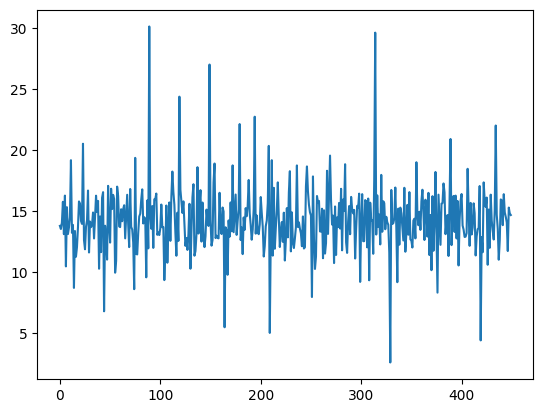

In [379]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("Starting training...")
loss_agg = []
for epoch in range(30):
    total_loss = 0
    print(f"Epoch {epoch+1}/{20}")
    
    for i, batched_graph in enumerate(train_dataloader):
        # Add self-loops to the batched graph
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        node_pred,g_pred  = model2(batched_graph[1], batched_graph[1].ndata['mass'].float())
        # print(batched_graph[2])
        labels = batched_graph[2]
        loss = F.mse_loss(g_pred, labels)
        loss_agg.append(loss.item())
        total_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress for each batch
        # if (i+1) % 10 == 0:
        #     print(f"  Batch {i+1}, Loss: {loss.item():.4f}")

    # Print the average loss for the epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1} finished, Average Loss: {avg_loss:.4f}")

print("Training completed. Starting testing...")
plt.plot(loss_agg)
# Testing loop
total_loss = 0
num_tests = 0

for i, batched_graph in enumerate(test_dataloader):
    # Add self-loops to the batched graph
    # print(batched_graph)
    # _batched_graph = dgl.add_self_loop(batched_graph[1])
    
    node_pred,g_pred  = model2(batched_graph[1], batched_graph[1].ndata['mass'].float())
    labels = batched_graph[2]
    if i == 1:
        print('predictions',g_pred)
        print('labels:',labels)
    mse = F.mse_loss(g_pred, labels)

    total_loss += (node_pred.argmax(1) == labels).sum().item()
    num_tests += len(labels)

    # Print progress for each batch
    if (i+1) % 10 == 0:
        print(f"  Testing Batch {i+1}/{len(test_dataloader)}")

# Calculate and print test accuracy
test_loss = total_loss / num_tests
print(f"Test accuracy: {test_loss:.4f}")

In [485]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print("Starting training...")
loss_agg = []
for epoch in range(30):
    total_loss = 0
    print(f"Epoch {epoch+1}/{20}")
    
    for i, batched_graph in enumerate(train_dataloader):
        # Add self-loops to the batched graph
        # _batched_graph = dgl.add_self_loop(batched_graph[1])
        
        node_pred,g_pred  = model(batched_graph[1], batched_graph[1].ndata['mass'].float())
        # print(batched_graph[2])
        labels = batched_graph[2]
        loss = F.mse_loss(g_pred, labels)
        loss_agg.append(loss.item())
        total_loss += loss.item()

        # Zero gradients, backward pass, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress for each batch
        # if (i+1) % 10 == 0:
        #     print(f"  Batch {i+1}, Loss: {loss.item():.4f}")

    # Print the average loss for the epoch
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1} finished, Average Loss: {avg_loss:.4f}")

print("Training completed. Starting testing...")
plt.plot(loss_agg)
# Testing loop
total_loss = 0
num_tests = 0

for i, batched_graph in enumerate(test_dataloader):
    # Add self-loops to the batched graph
    # print(batched_graph)
    # _batched_graph = dgl.add_self_loop(batched_graph[1])
    
    node_pred,g_pred  = model(batched_graph[1], batched_graph[1].ndata['mass'].float())
    labels = batched_graph[2]
    if i == 1:
        print('predictions',g_pred)
        print('labels:',labels)
    mse = F.mse_loss(g_pred, labels)

    total_loss += (node_pred.argmax(1) == labels).sum().item()
    num_tests += len(labels)

    # Print progress for each batch
    if (i+1) % 10 == 0:
        print(f"  Testing Batch {i+1}/{len(test_dataloader)}")

# Calculate and print test accuracy
test_loss = total_loss / num_tests
print(f"Test accuracy: {test_loss:.4f}")

Starting training...
Epoch 1/20


RuntimeError: mat1 and mat2 shapes cannot be multiplied (867x1 and 10x32)

# Graph Sage

# GAT

# Gated GNNs